## Exploring Rat Dataset

Notebook for exploring rat dataset, writing import functions etc.

February 2023

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib 
import platform
sns.set_context("talk")


In [7]:
if platform.system() == "Windows":
    DATA_PATH = pathlib.Path("X:\jbreda\learning_project\data")
else:
    DATA_PATH = pathlib.Path("/Volumes/brody/jbreda/learning_project/data" )
F_NAME = "rat_behavior.csv"
ANIMAL_ID = "W080"

#### Load CSV -> DF

In [8]:
DATA_PATH/F_NAME

PosixPath('/Volumes/brody/jbreda/learning_project/data/rat_behavior.csv')

In [9]:
RAT_DF = pd.read_csv(DATA_PATH/F_NAME)

In [10]:
RAT_DF["violation"] = RAT_DF.hit.isnull()
RAT_DF.subject_id = RAT_DF.subject_id.astype("string")
RAT_DF["n_trial"] = RAT_DF.index
RAT_DF['training_stage_cat'] = RAT_DF['training_stage'].astype('category')

RAT_DF.head()

subject_id  session  trial  s_a  s_b  choice  correct_side  hit  delay   
0       W051        1      1  NaN  NaN     1.0             0  0.0   1.00  \
1       W051        2      1  NaN  NaN     1.0             0  0.0   0.01   
2       W051        2      2  NaN  NaN     0.0             0  1.0   0.01   
3       W051        2      3  NaN  NaN     0.0             1  0.0   0.01   
4       W051        2      4  NaN  NaN     1.0             0  0.0   0.01   

   training_stage  violation  n_trial training_stage_cat  
0               1      False        0                  1  
1               1      False        1                  1  
2               1      False        2                  1  
3               1      False        3                  1  
4               1      False        4                  1

In [11]:
W080_df = RAT_DF.query('subject_id == @ANIMAL_ID').reset_index(drop=True)

In [12]:
W080_df.head()

subject_id  session  trial  s_a  s_b  choice  correct_side  hit  delay   
0       W080        1      1  NaN  NaN     0.0             0  1.0   0.01  \
1       W080        1      2  NaN  NaN     1.0             0  0.0   0.01   
2       W080        1      3  NaN  NaN     1.0             0  0.0   0.01   
3       W080        1      4  NaN  NaN     0.0             0  1.0   0.01   
4       W080        1      5  NaN  NaN     0.0             1  0.0   0.01   

   training_stage  violation  n_trial training_stage_cat  
0               1      False  1617851                  1  
1               1      False  1617852                  1  
2               1      False  1617853                  1  
3               1      False  1617854                  1  
4               1      False  1617855                  1

In [13]:
W080_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97696 entries, 0 to 97695
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   subject_id          97696 non-null  string  
 1   session             97696 non-null  int64   
 2   trial               97696 non-null  int64   
 3   s_a                 89491 non-null  float64 
 4   s_b                 89491 non-null  float64 
 5   choice              78540 non-null  float64 
 6   correct_side        97696 non-null  int64   
 7   hit                 78540 non-null  float64 
 8   delay               97696 non-null  float64 
 9   training_stage      97696 non-null  int64   
 10  violation           97696 non-null  bool    
 11  n_trial             97696 non-null  int64   
 12  training_stage_cat  97696 non-null  category
dtypes: bool(1), category(1), float64(5), int64(5), string(1)
memory usage: 8.4 MB


## Sessions & Stage

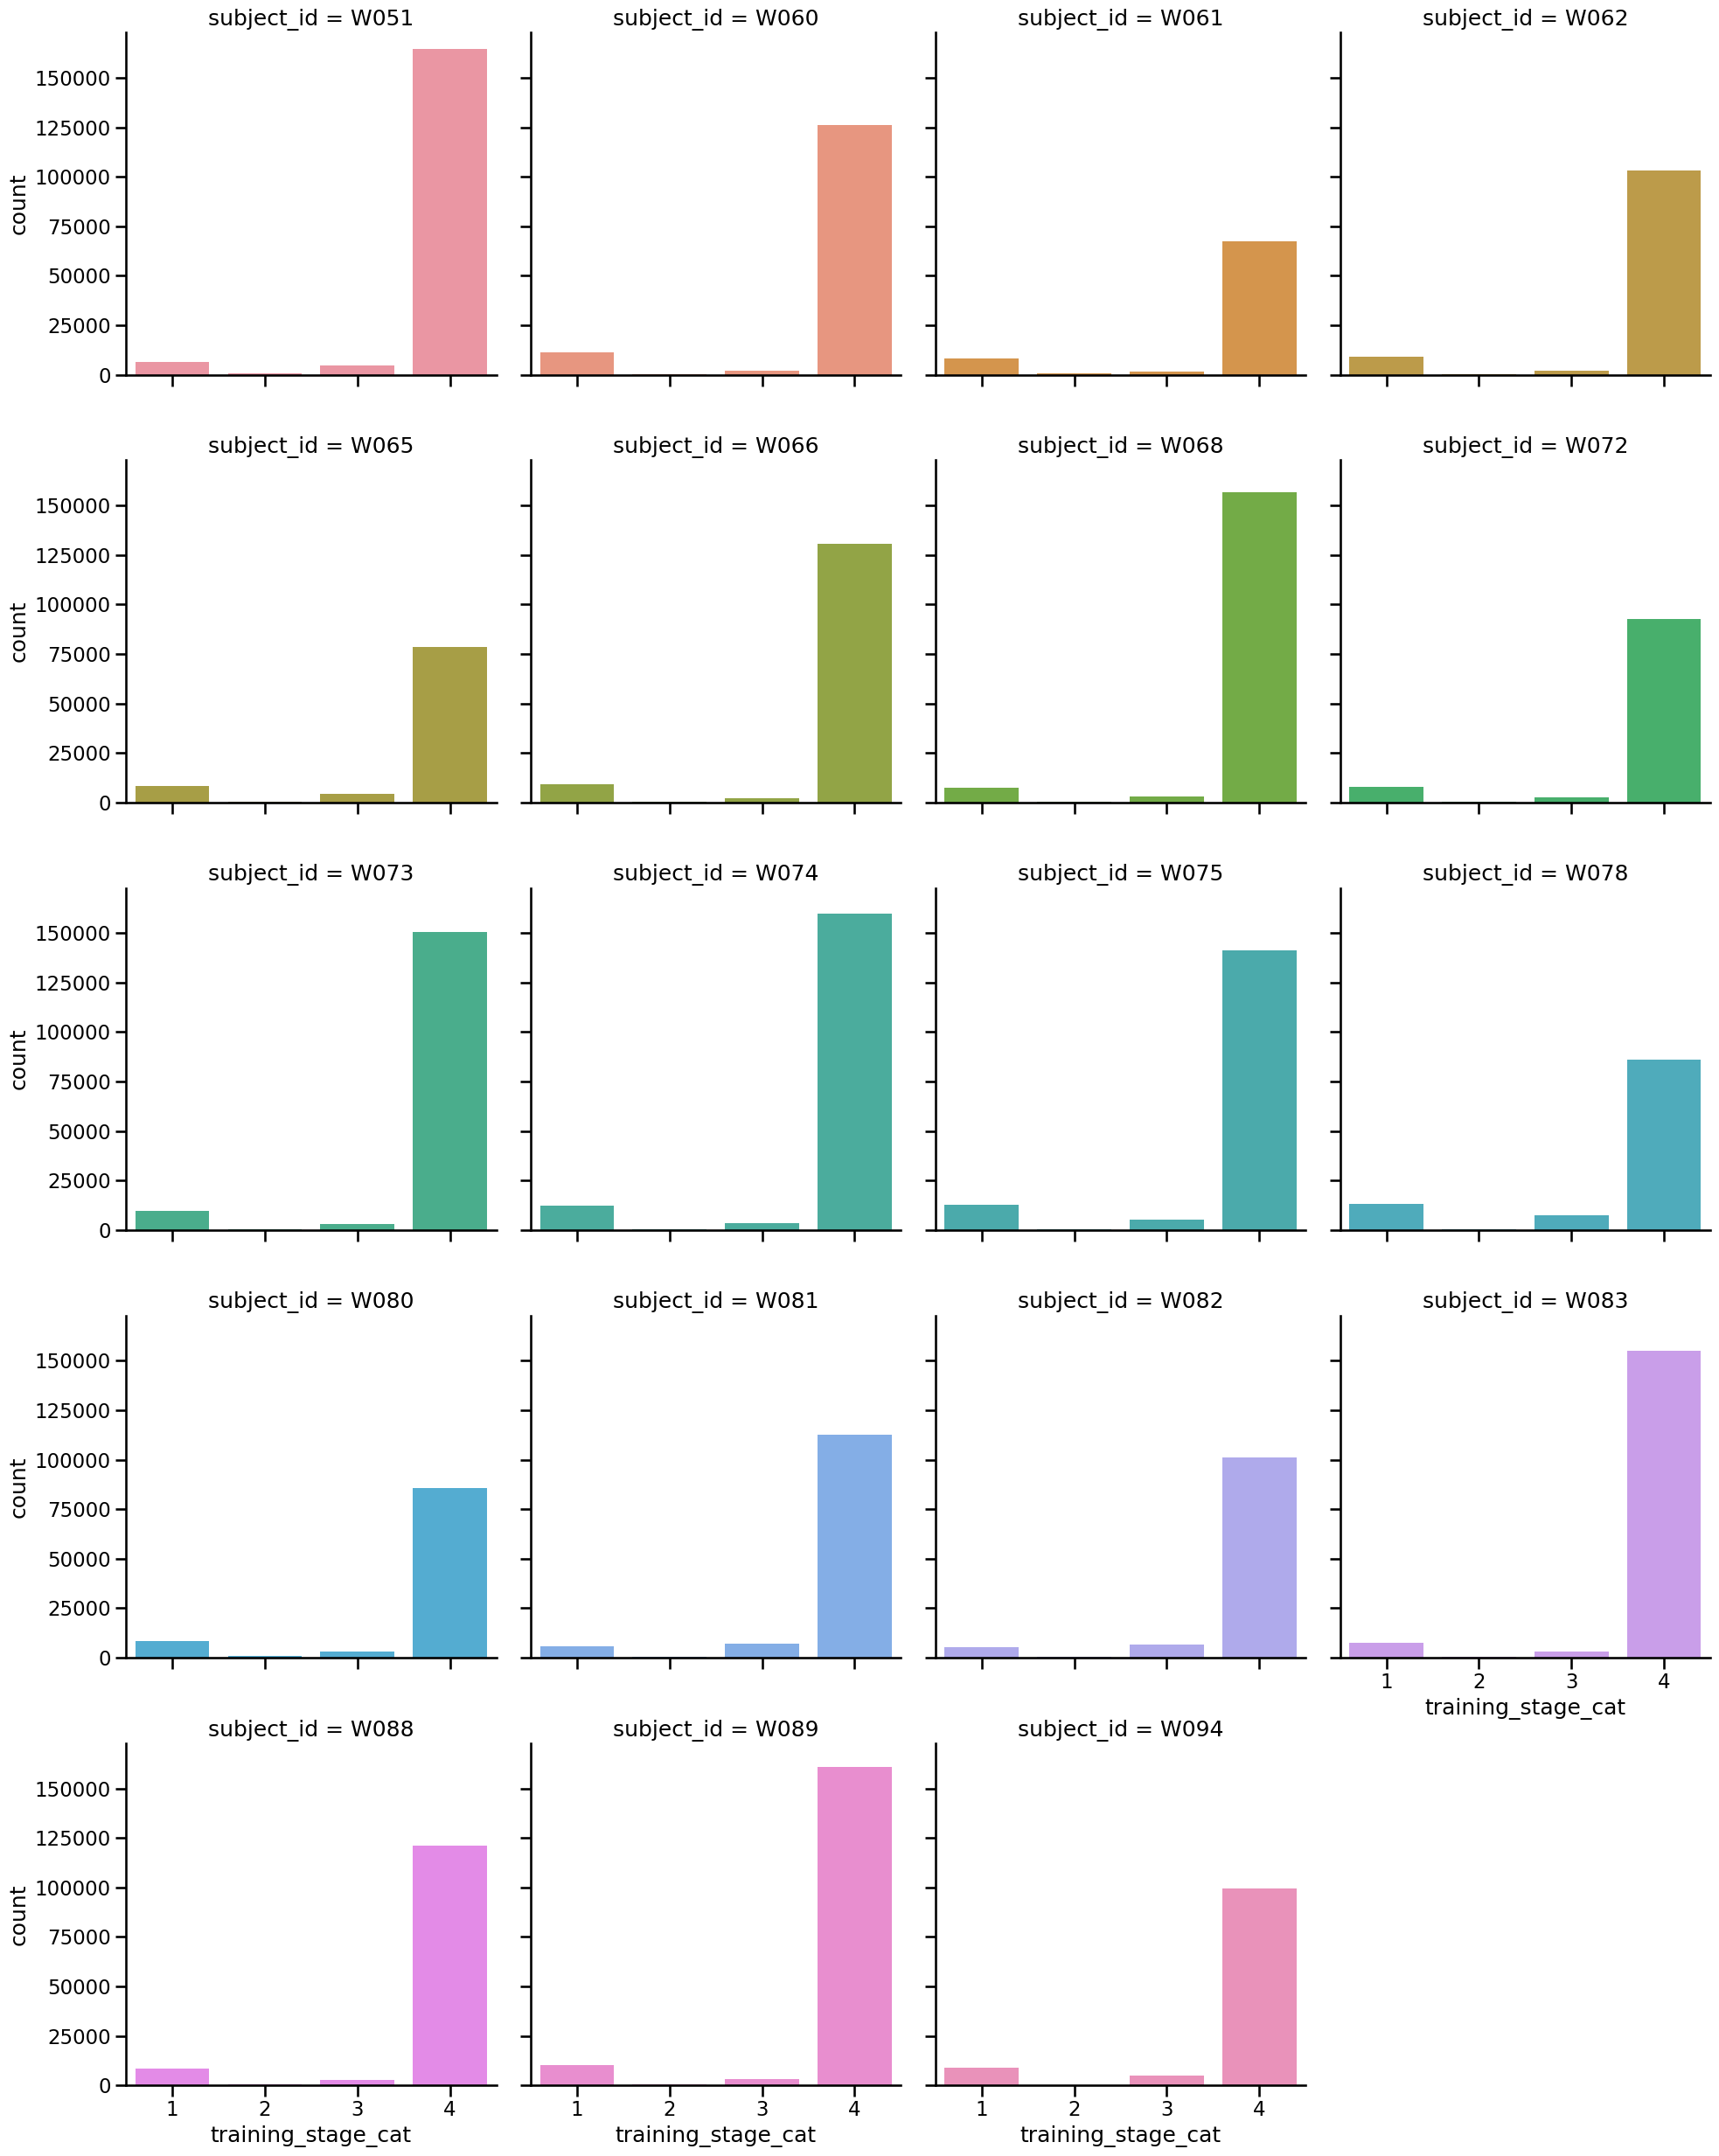

In [14]:
g = sns.catplot(
    x="training_stage_cat", 
    col="subject_id", 
    col_wrap=4, 
    hue="subject_id", 
    data=RAT_DF, 
    kind="count", 
    dodge=False,
    sharey=True

)


<Axes: xlabel='training_stage_cat', ylabel='trial'>

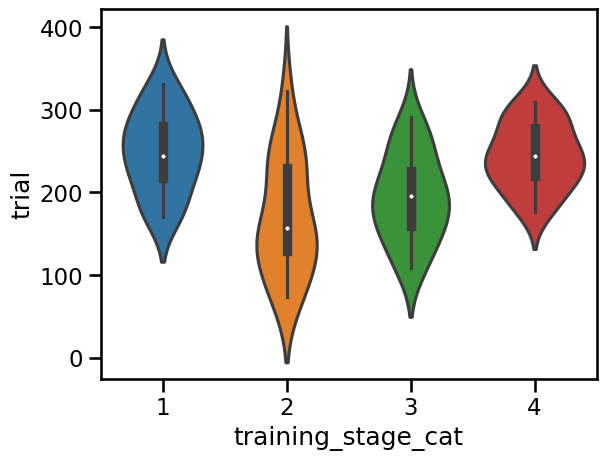

In [144]:
sns
trials_per_session = RAT_DF.groupby(['training_stage_cat', 'subject_id','session']) \
                        .trial.max() \
                        .reset_index() \
                        .groupby(['training_stage_cat', 'subject_id']) \
                        .trial.mean() \
                        .reset_index()

sns.violinplot(data=trials_per_session, x="training_stage_cat", y="trial")

ax.set_title("N Trials per Session")

Text(0.5, 1.0, 'N trials per Session')

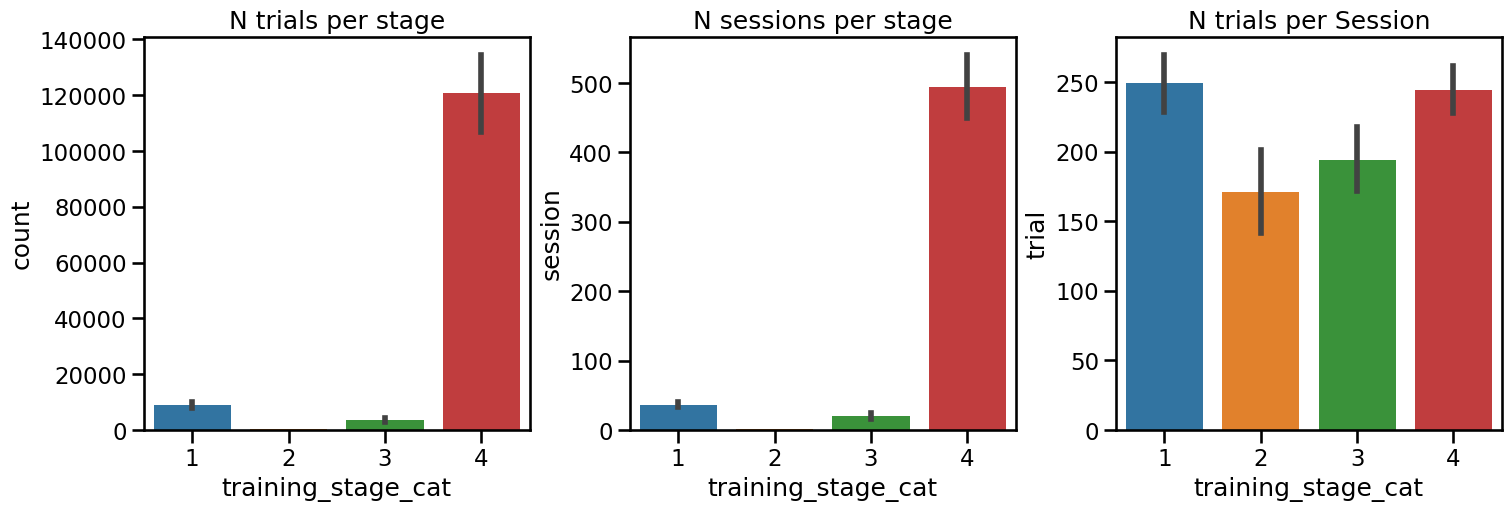

In [148]:
fig,ax = plt.subplots(1, 3, figsize = (15,5), constrained_layout=True)

trial_counts = RAT_DF.groupby(["training_stage_cat", "subject_id"]).size().reset_index(name="count")

sns.barplot(trial_counts, x="training_stage_cat", y="count", ax=ax[0])
ax[0].set_title("N trials per stage")

session_counts = RAT_DF.groupby(["subject_id", "training_stage_cat"])["session"].nunique().reset_index()

sns.barplot(data=session_counts, x="training_stage_cat", y="session", ax=ax[1])
ax[1].set_title("N sessions per stage")

sns.barplot(data=trials_per_session, x="training_stage_cat", y="trial", ax=ax[2])
ax[2].set_title("N trials per Session")

In [150]:
# plot the number of trials per session averaged across all animals
# fig,ax = plt.subplots(1, 1, figsize = (10,5), constrained_layout=True)

# TODO could avg number of trials be a good metric for learning?
session_counts = RAT_DF.groupby(["subject_id", "session"])["trial"].max().reset_index()
# sns.barplot(data=session_counts, x="subject_id", y="trial",ax=ax)
# ax.setxticklabels(ax.get_xticks(),rotation=45)


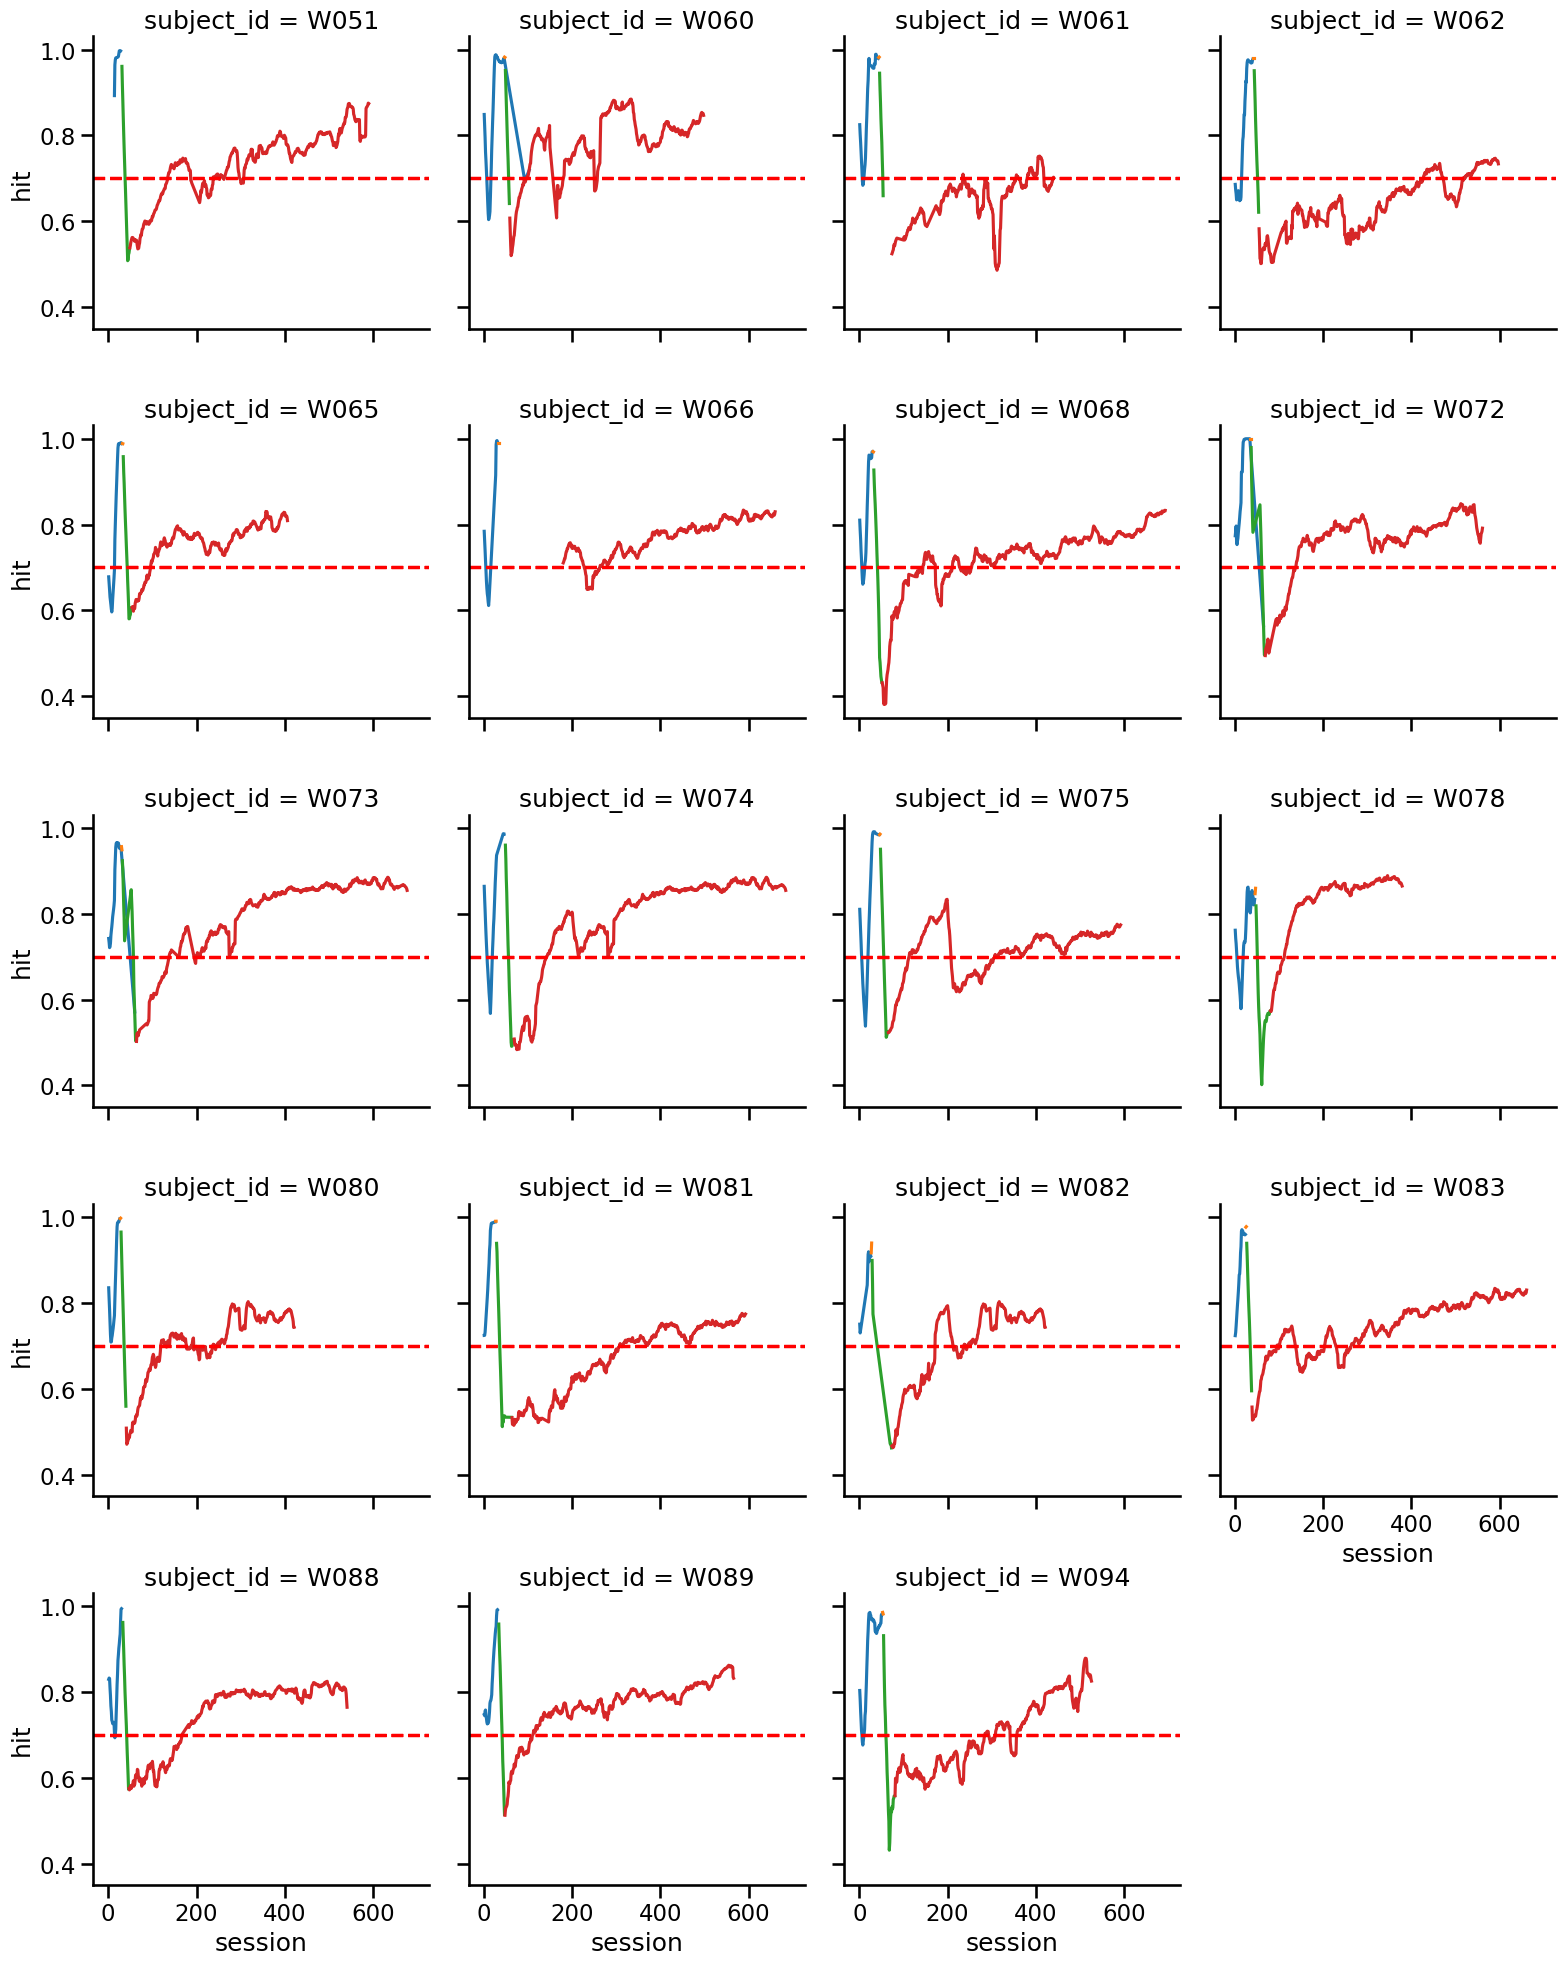

In [102]:
# Groupby subject and session, and calculate the mean hit for each subject-session combination
grouped_df = RAT_DF.groupby(["subject_id", "session", "training_stage"]).hit.mean()

# Calculate the rolling mean with a window of 50 for each subject
rolling_mean = grouped_df.rolling(window=14).mean().reset_index()

# # Create the facet grid plot
g = sns.FacetGrid(data=rolling_mean, col="subject_id", col_wrap=4, hue="training_stage", height=4)
g.map(sns.lineplot, "session", "hit")
g.map(plt.axhline, y=0.7, color='red', linestyle='--')


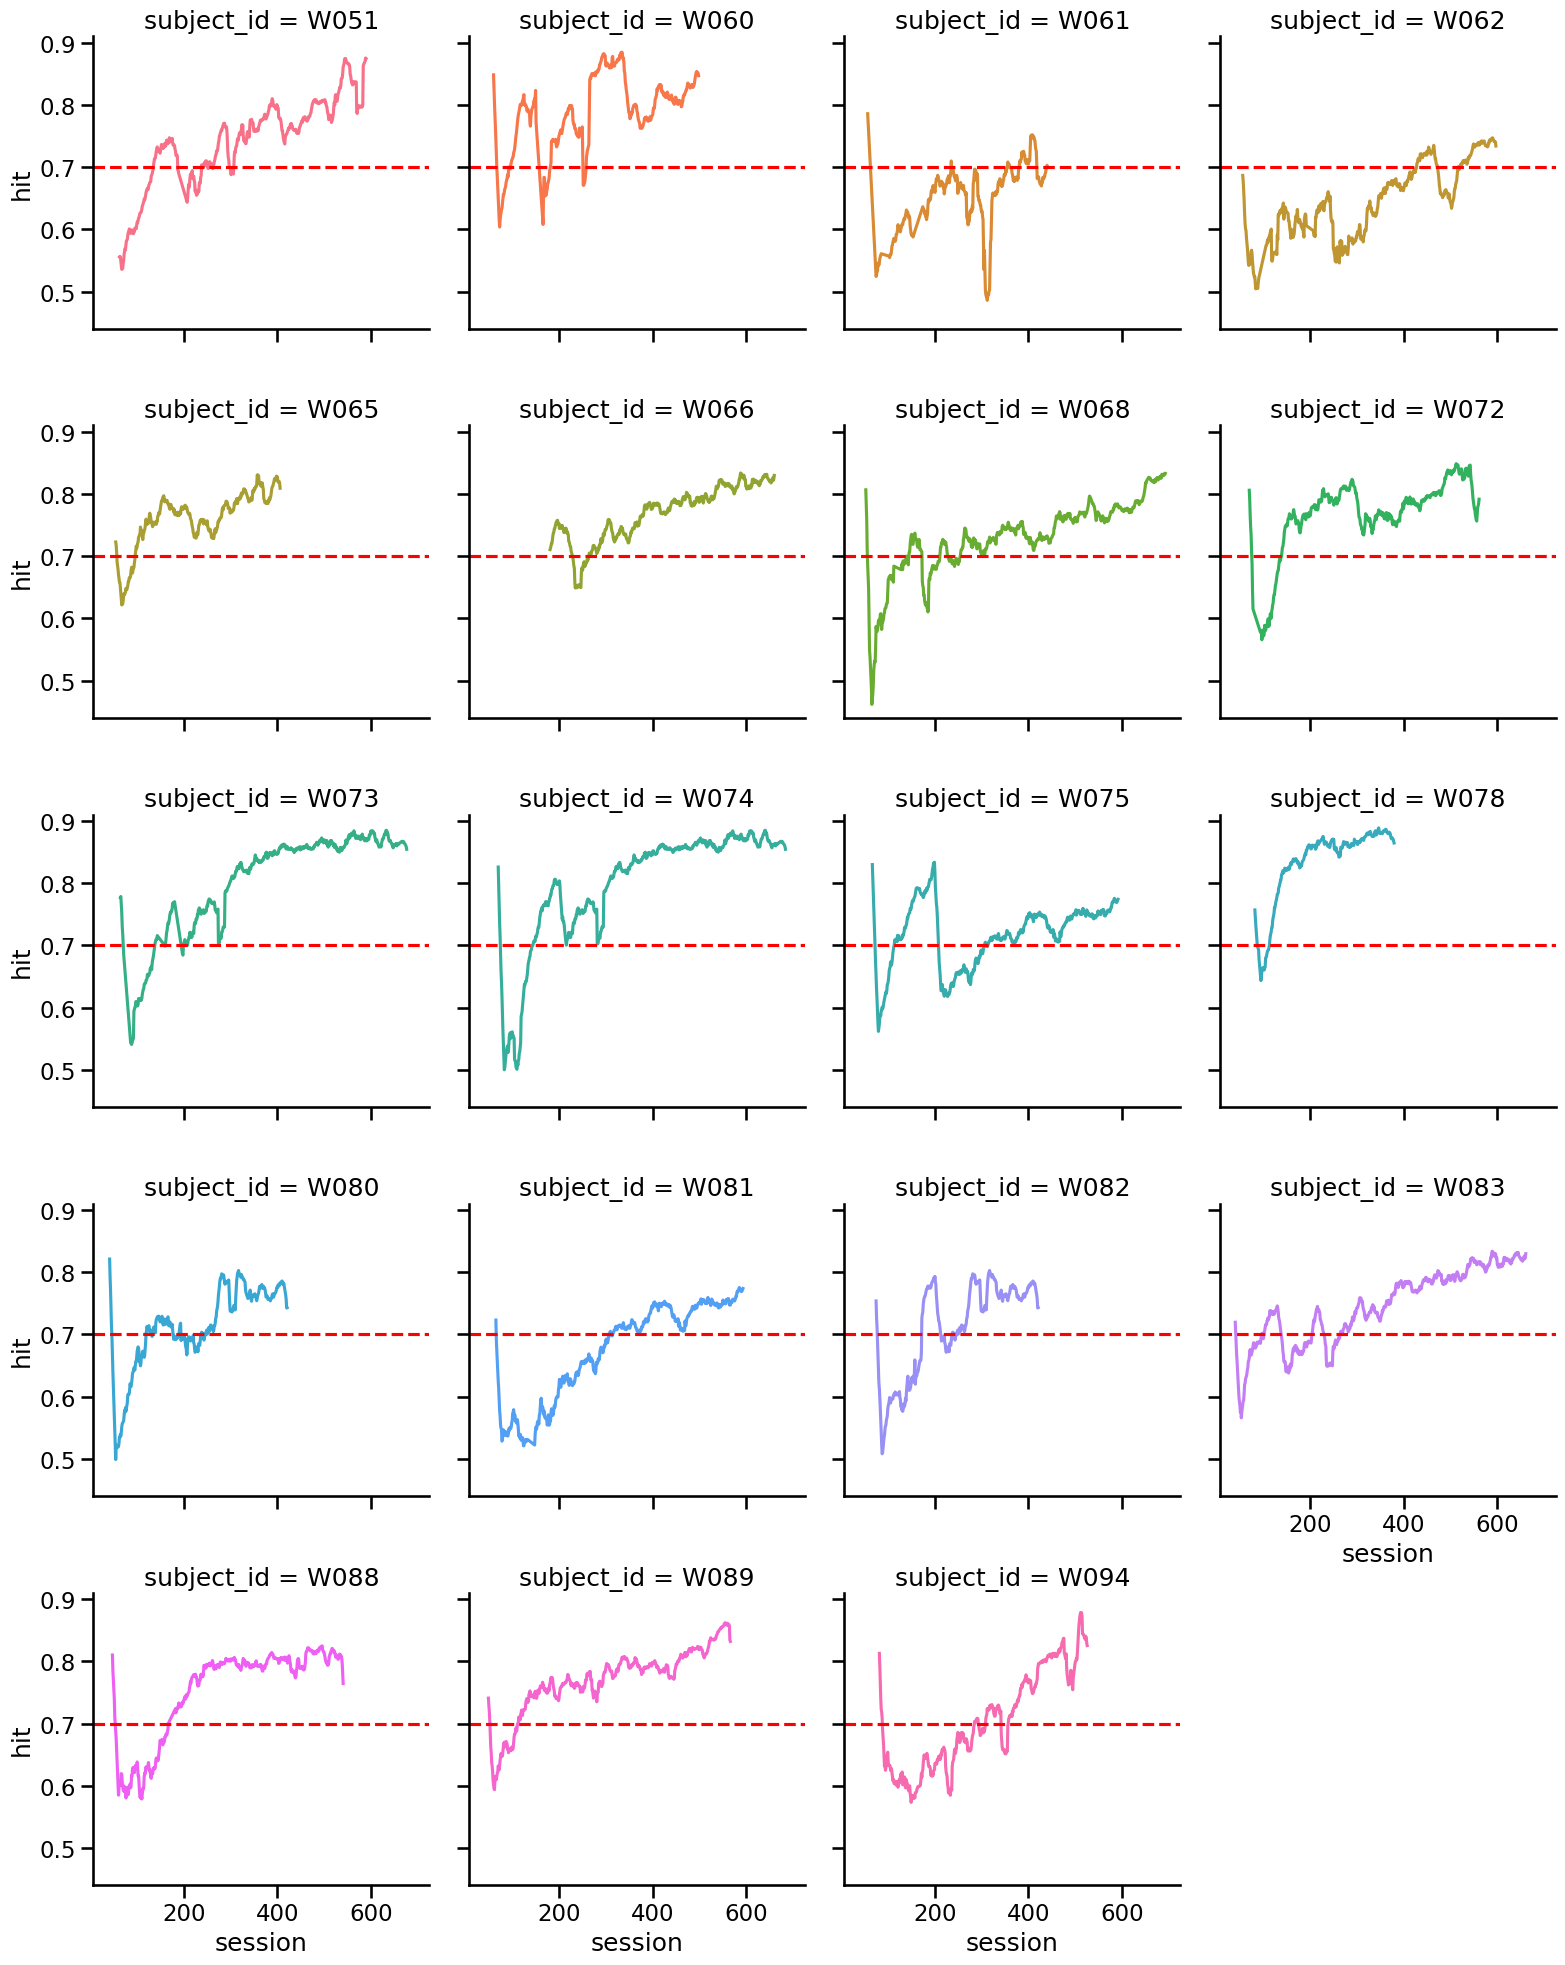

In [103]:
# Groupby subject and session, and calculate the mean hit for each subject-session combination
grouped_df = RAT_DF.query("training_stage_cat == 4").groupby(["subject_id", "session"]).hit.mean()

# Calculate the rolling mean with a window of 50 for each subject
rolling_mean = grouped_df.rolling(window=14).mean().reset_index()

# # Create the facet grid plot
g = sns.FacetGrid(data=rolling_mean, col="subject_id", col_wrap=4, hue="subject_id", height=4)
g.map(sns.lineplot, "session", "hit")
g.map(plt.axhline, y=0.7, color='red', linestyle='--')



In [107]:
threshold = 0.7
rolling_mean['crossed_threshold'] = (rolling_mean['hit'].shift() < threshold) & (rolling_mean['hit'] >= threshold)
crossings_count = rolling_mean.groupby('subject_id')['crossed_threshold'].sum()

In [108]:
train_threshold_df = pd.DataFrame({'subject_id': crossings_count.index})
train_threshold_df['avg_hit'] = RAT_DF.query("training_stage_cat == 4").groupby("subject_id").hit.mean().values
train_threshold_df['n_crossings'] = crossings_count.values
train_threshold_df['first_cross_sess'] = rolling_mean.groupby('subject_id').apply(lambda x: x.loc[x['crossed_threshold']].session.min()).values
train_threshold_df['avg_cross_sess'] = rolling_mean.groupby('subject_id').apply(lambda x: x.loc[x['crossed_threshold']].session.mean()).values
train_threshold_df['max_cross_sess'] = rolling_mean.groupby('subject_id').apply(lambda x: x.loc[x['crossed_threshold']].session.max()).values

train_threshold_df

subject_id   avg_hit  n_crossings  first_cross_sess  avg_cross_sess   
0        W051  0.749555            6               135      239.500000  \
1        W060  0.792743            4                92      156.750000   
2        W061  0.649281            5               235      354.200000   
3        W062  0.666781            3               428      488.666667   
4        W065  0.763912            1                96       96.000000   
5        W066  0.760298            1               263      263.000000   
6        W068  0.755782            4               139      187.250000   
7        W072  0.779687            1               138      138.000000   
8        W073  0.817714            3               138      166.333333   
9        W074  0.816161            1               144      144.000000   
10       W075  0.724997            3               113      244.666667   
11       W078  0.843409            1               113      113.000000   
12       W080  0.723412            7               119      193.428571   
13       W081  0.705802            2               308      311.500000   
14       W082  0.723070            4               172      224.000000   
15       W083  0.749971            4                96      166.250000   
16       W088  0.778638            1               167      167.000000   
17       W089  0.787937            1               111      111.000000   
18       W094  0.743108            3               285      317.000000   

    max_cross_sess  
0              307  
1              258  
2              439  
3              521  
4               96  
5              263  
6              255  
7              138  
8              200  
9              144  
10             314  
11             113  
12             246  
13             315  
14             246  
15             264  
16             167  
17             111  
18             357

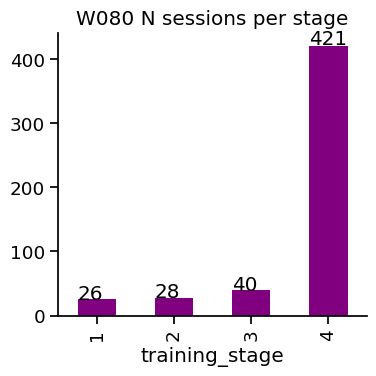

In [87]:
sns.set_context("notebook", font_scale=1.2)
ax = (W080_df.groupby("training_stage")
 .max()
 .session
 .plot.bar(
    title=f"{ANIMAL_ID} N sessions per stage",
    figsize=(4,4),
    color = 'purple'
    )
)
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() * 1, 
                 p.get_height() * 1.005))

sns.despine()
plt.tight_layout()

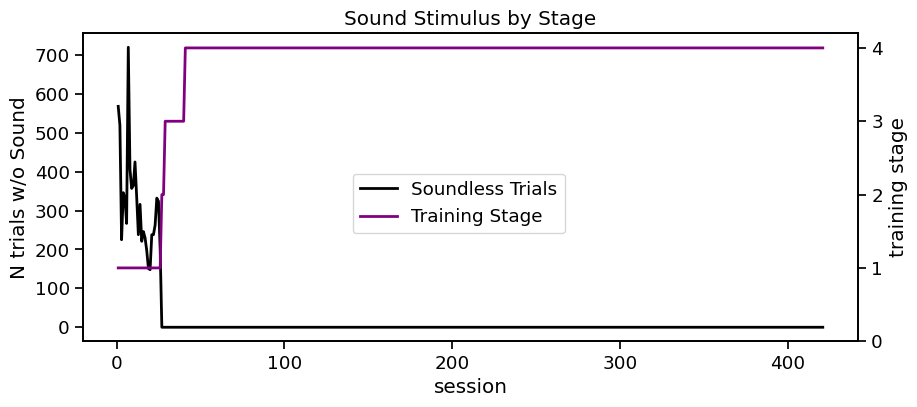

In [12]:
fig,ax = plt.subplots(figsize = (10,4))

sns.lineplot(
    W080_df["s_a"].isnull().groupby(W080_df['session']).sum(),
    ax=ax, color = "black", linewidth=2,
    label= "Soundless Trials", legend=False
    )

ax2=plt.twinx()
sns.lineplot(
    W080_df.groupby("session").training_stage.max(),
    ax=ax2, color="purple", linewidth=2,
    label="Training Stage", legend=False
    )

ax.set(ylabel= "N trials w/o Sound", title="Sound Stimulus by Stage")
ax2.set(ylabel= "training stage",ylim=(0, 4.2))
fig.legend(loc="center")



## Mistrials

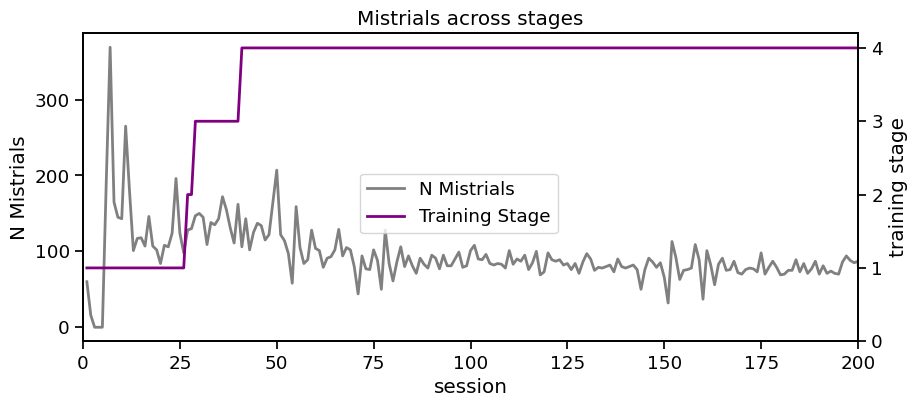

In [136]:
fig,ax = plt.subplots(figsize = (10,4))

sns.lineplot(
    W080_df["hit"].isnull().groupby(W080_df['session']).sum(),
    ax=ax, color = "gray", linewidth=2,
    label= "N Mistrials", legend=False
    )
ax.set_xlim(0,200)
ax2=plt.twinx()
sns.lineplot(
    W080_df.groupby("session").training_stage.max(),
    ax=ax2, color="purple", linewidth=2,
    label="Training Stage", legend=False
    )

ax.set(ylabel= "N Mistrials", title="Mistrials across stages")
ax2.set(ylabel= "training stage",ylim=(0, 4.2))
fig.legend(loc="center")


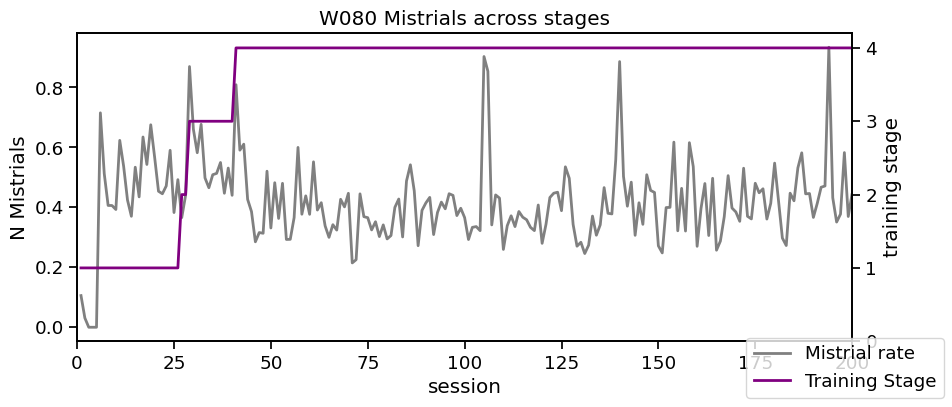

In [139]:
fig,ax = plt.subplots(figsize = (10,4))

sns.lineplot(
    W080_df["hit"].isnull().groupby(W080_df['session']).mean(),
    ax=ax, color = "gray", linewidth=2,
    label= "Mistrial rate", legend=False
    )
ax.set_xlim(0,200)
ax2=plt.twinx()
sns.lineplot(
    W080_df.groupby("session").training_stage.max(),
    ax=ax2, color="purple", linewidth=2,

    label="Training Stage", legend=False
    )

ax.set(ylabel= "N Mistrials", title="W080 Mistrials across stages")
ax2.set(ylabel= "training stage",ylim=(0, 4.2))
fig.legend(loc="lower right")


# Session for violation cut off

In [11]:
W080_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97696 entries, 0 to 97695
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subject_id      97696 non-null  string 
 1   session         97696 non-null  int64  
 2   trial           97696 non-null  int64  
 3   s_a             89491 non-null  float64
 4   s_b             89491 non-null  float64
 5   choice          78540 non-null  float64
 6   correct_side    97696 non-null  int64  
 7   hit             78540 non-null  float64
 8   delay           97696 non-null  float64
 9   training_stage  97696 non-null  int64  
 10  violation       97696 non-null  bool   
dtypes: bool(1), float64(5), int64(4), string(1)
memory usage: 7.5 MB


In [27]:
def determine_session_violation_drop(animal_df, threshold=30):
    null_counts = animal_df['hit'].isnull().groupby(animal_df['session']).sum()
    mask = (null_counts.index > threshold) & (null_counts == 0)
    return mask.argmax() # first session where there is 0 violations

def determine_stage_violation_drop(animal_df, session_drop):
    return animal_df.query(f'session == {session_drop}').training_stage.max()

def determine_average_hits_violation_drop(animal_df, session_drop, window=10):
    # get performance for the 10 sessions leading up to the drop
    return animal_df.query(f'session > {session_drop-window} & session < {session_drop+1}').hit.mean()

def determine_average_viols_violation_drop(animal_df, session_drop, window=10):
    # get performance for the 10 sessions leading up to the drop
    return animal_df.query(f'session > {session_drop-window} & session < {session_drop+1}').violation.mean()

def determine_total_trials_violation_drop(animal_df, session_drop):
    return len(animal_df.query(f'session < {session_drop}'))

def determine_stage_4_trials_violation_drop(animal_df, session_drop):
    return len(animal_df.query(f'session < {session_drop} & training_stage == 4'))



In [32]:
len(W080_df.query(f'session < {200} & training_stage == 4'))

36295

In [28]:
viol_df = RAT_DF.groupby("subject_id").apply(lambda group: pd.Series({
    "animal_id": group.name,
    "session_viol_drop": determine_session_violation_drop(group),
    "stage_viol_drop": determine_stage_violation_drop(group, determine_session_violation_drop(group)),
    "hit_viol_drop": determine_average_hits_violation_drop(group, determine_session_violation_drop(group),window=10),
    "viol_viol_drop": determine_average_viols_violation_drop(group, determine_session_violation_drop(group),window=10),
    "n_trials_viol_drop": determine_total_trials_violation_drop(group, determine_session_violation_drop(group)),
    "n_stage_4_trials_viol_drop": determine_stage_4_trials_violation_drop(group, determine_session_violation_drop(group)),
})).reset_index(drop=True)



In [29]:
viol_df.head()

animal_id  session_viol_drop  stage_viol_drop  hit_viol_drop   
0      W051                196                4       0.631285  \
1      W060                199                4       0.751385   
2      W061                200                4       0.667571   
3      W062                199                4       0.614017   
4      W065                199                4       0.781170   

   viol_viol_drop  n_trials_viol_drop  n_stage_4_trials_viol_drop  
0        0.272780               62110                       50406  
1        0.122722               54837                       41109  
2        0.199348               41102                       30743  
3        0.311239               34676                       23312  
4        0.239257               49843                       36812

(0.0, 230.0)

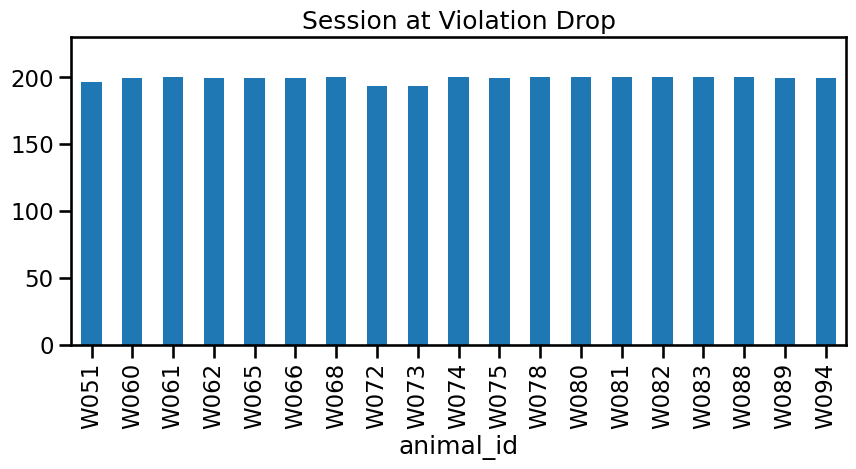

In [33]:
fig,ax = plt.subplots(figsize = (10,4))
viol_df.plot(kind="bar", x="animal_id", y="session_viol_drop", title="Session at Violation Drop", legend=False,ax=ax)
plt.ylim(0,230)

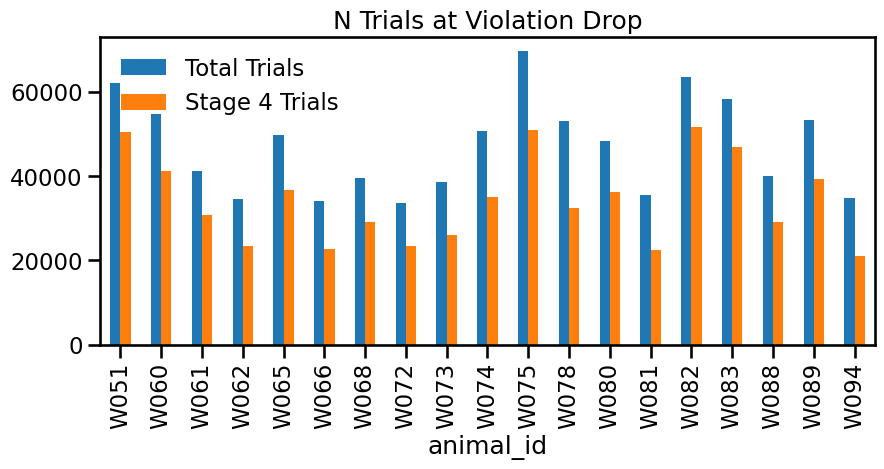

In [38]:
fig,ax = plt.subplots(figsize = (10,4))
viol_df.plot(kind="bar", 
             x="animal_id", 
             y=["n_trials_viol_drop", "n_stage_4_trials_viol_drop"], 
             title="N Trials at Violation Drop", 
             label=["Total Trials", "Stage 4 Trials"],
             legend=True,
             ax=ax)
ax.legend(frameon=False)

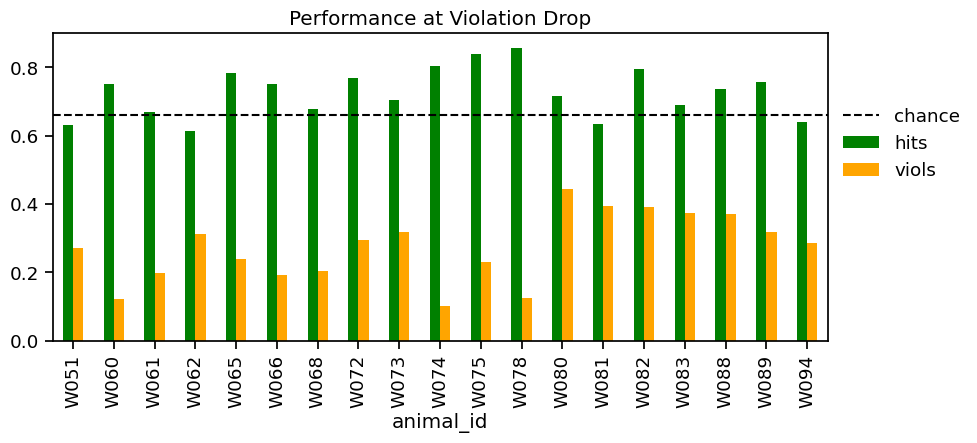

In [18]:
fig,ax = plt.subplots(figsize = (10,4))
viol_df.plot(kind="bar", x="animal_id", y=["hit_viol_drop", "viol_viol_drop"],
             color=['green', 'orange'], label=["hits", "viols"],legend=True, title="Performance at Violation Drop",ax=ax)

ax.axhline(y=0.66, color='k', linestyle='--', zorder=1, label="chance")
ax.legend(loc=(1.01,0.5), frameon=False)

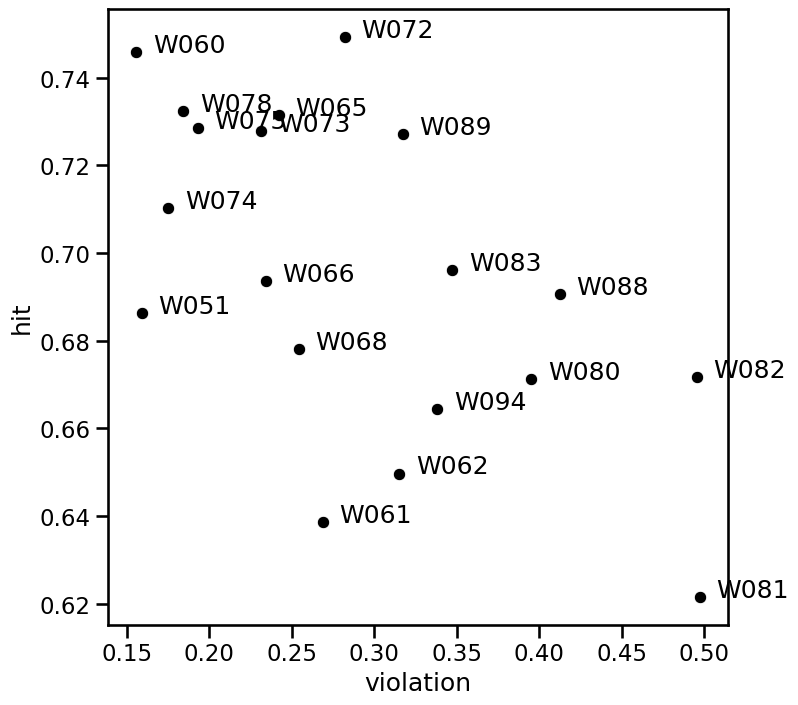

In [40]:
fig,ax = plt.subplots(figsize = (8,8))
rat_df_w_viols = RAT_DF.query('session <= 200')
group = rat_df_w_viols.groupby("subject_id").mean()
sns.scatterplot(
    x=group["violation"],
    y=group["hit"],
    color="k",
    ax=ax
)
for index, row in group.iterrows():
    ax.text(row["violation"] + 0.01, row["hit"], str(index))

[(0.0, 1.0), (0.0, 1.0)]

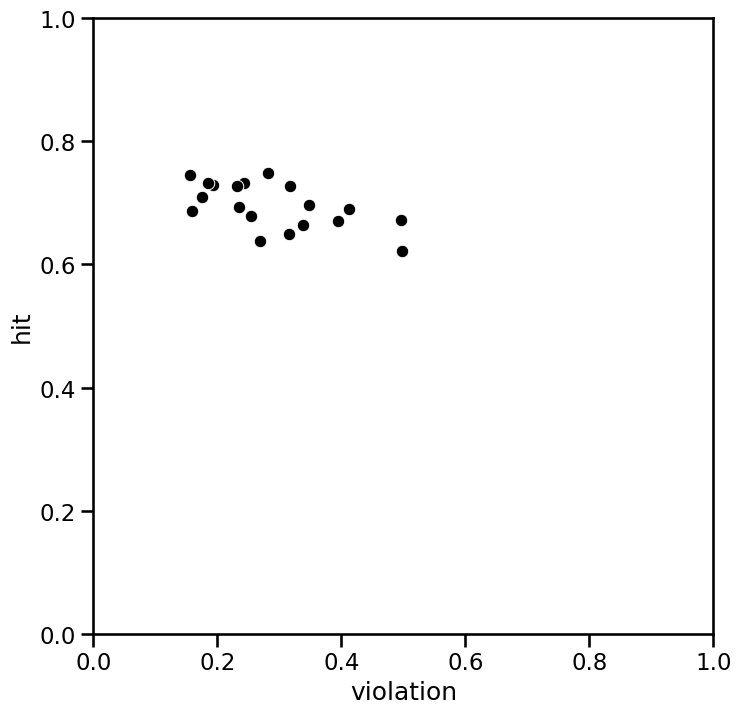

In [41]:
fig,ax = plt.subplots(figsize = (8,8))
rat_df_w_viols = RAT_DF.query('session <= 200')
group = rat_df_w_viols.groupby("subject_id").mean()
sns.scatterplot(
    x=group["violation"],
    y=group["hit"],
    color="k",
    ax=ax
)
# for index, row in group.iterrows():
#     ax.text(row["violation"] + 0.01, row["hit"], str(index))
ax.set(ylim=(0,1), xlim=(0,1))
# plt.text(group.index, (group["violation"], group["hit"]))

In [51]:
import statsmodels.api as sm

group.reset_index(inplace=True)

X = group["violation"].values.reshape(-1,1)
y = group["hit"].values.reshape(-1,1)

# Add a constant term to the predictor variable
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     9.285
Date:                Wed, 24 May 2023   Prob (F-statistic):            0.00728
Time:                        14:33:44   Log-Likelihood:                 40.284
No. Observations:                  19   AIC:                            -76.57
Df Residuals:                      17   BIC:                            -74.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7564      0.021     35.713      0.0

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


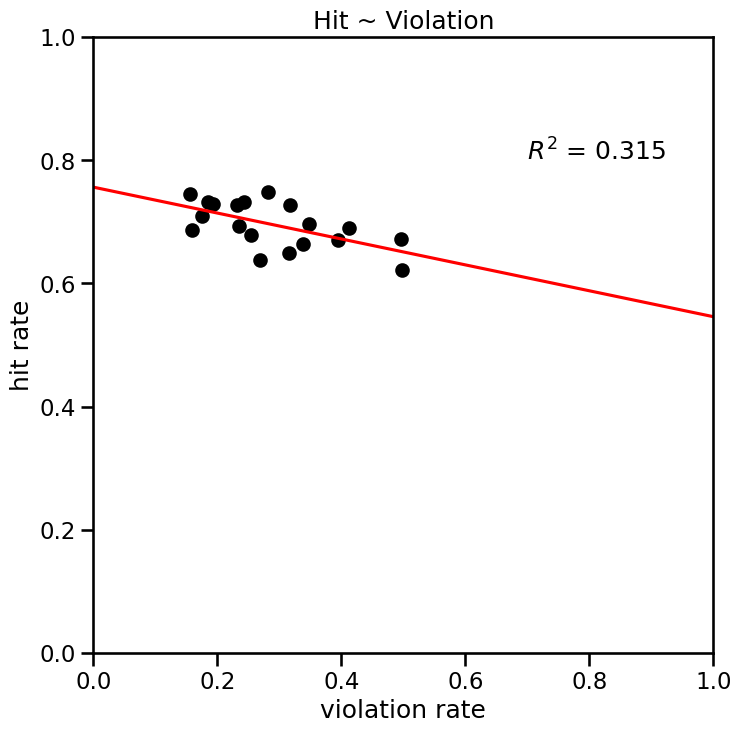

In [77]:
plt.figure(figsize=(8,8))
slope = results.params[1]
intercept = results.params[0]

# Plot the data points
plt.scatter(group['violation'],group['hit'], color='black', label='Data')

# Plot the line model
x_line =x_line = np.linspace(0, 1, 100)

# Calculate the corresponding y-values based on the linear regression model
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('violation rate')
plt.ylabel('hit rate')
plt.title('Hit ~ Violation')
plt.ylim(0,1)
plt.xlim(0,1)

# Add legend
plt.text(0.7, 0.8, "$R^2$ = 0.315")
# Display the plot
plt.show()


## Delays

Plot 1 - number of unique delay lengths by stage per animal


In [89]:

# get unique delay values for each animal
unique_delays = RAT_DF.groupby(["subject_id", "training_stage_cat"]).delay.unique().reset_index()

# get the number of unique delay values for each animal
unique_delays["n_unique_delays"] = unique_delays.delay.apply(lambda x: len(x))

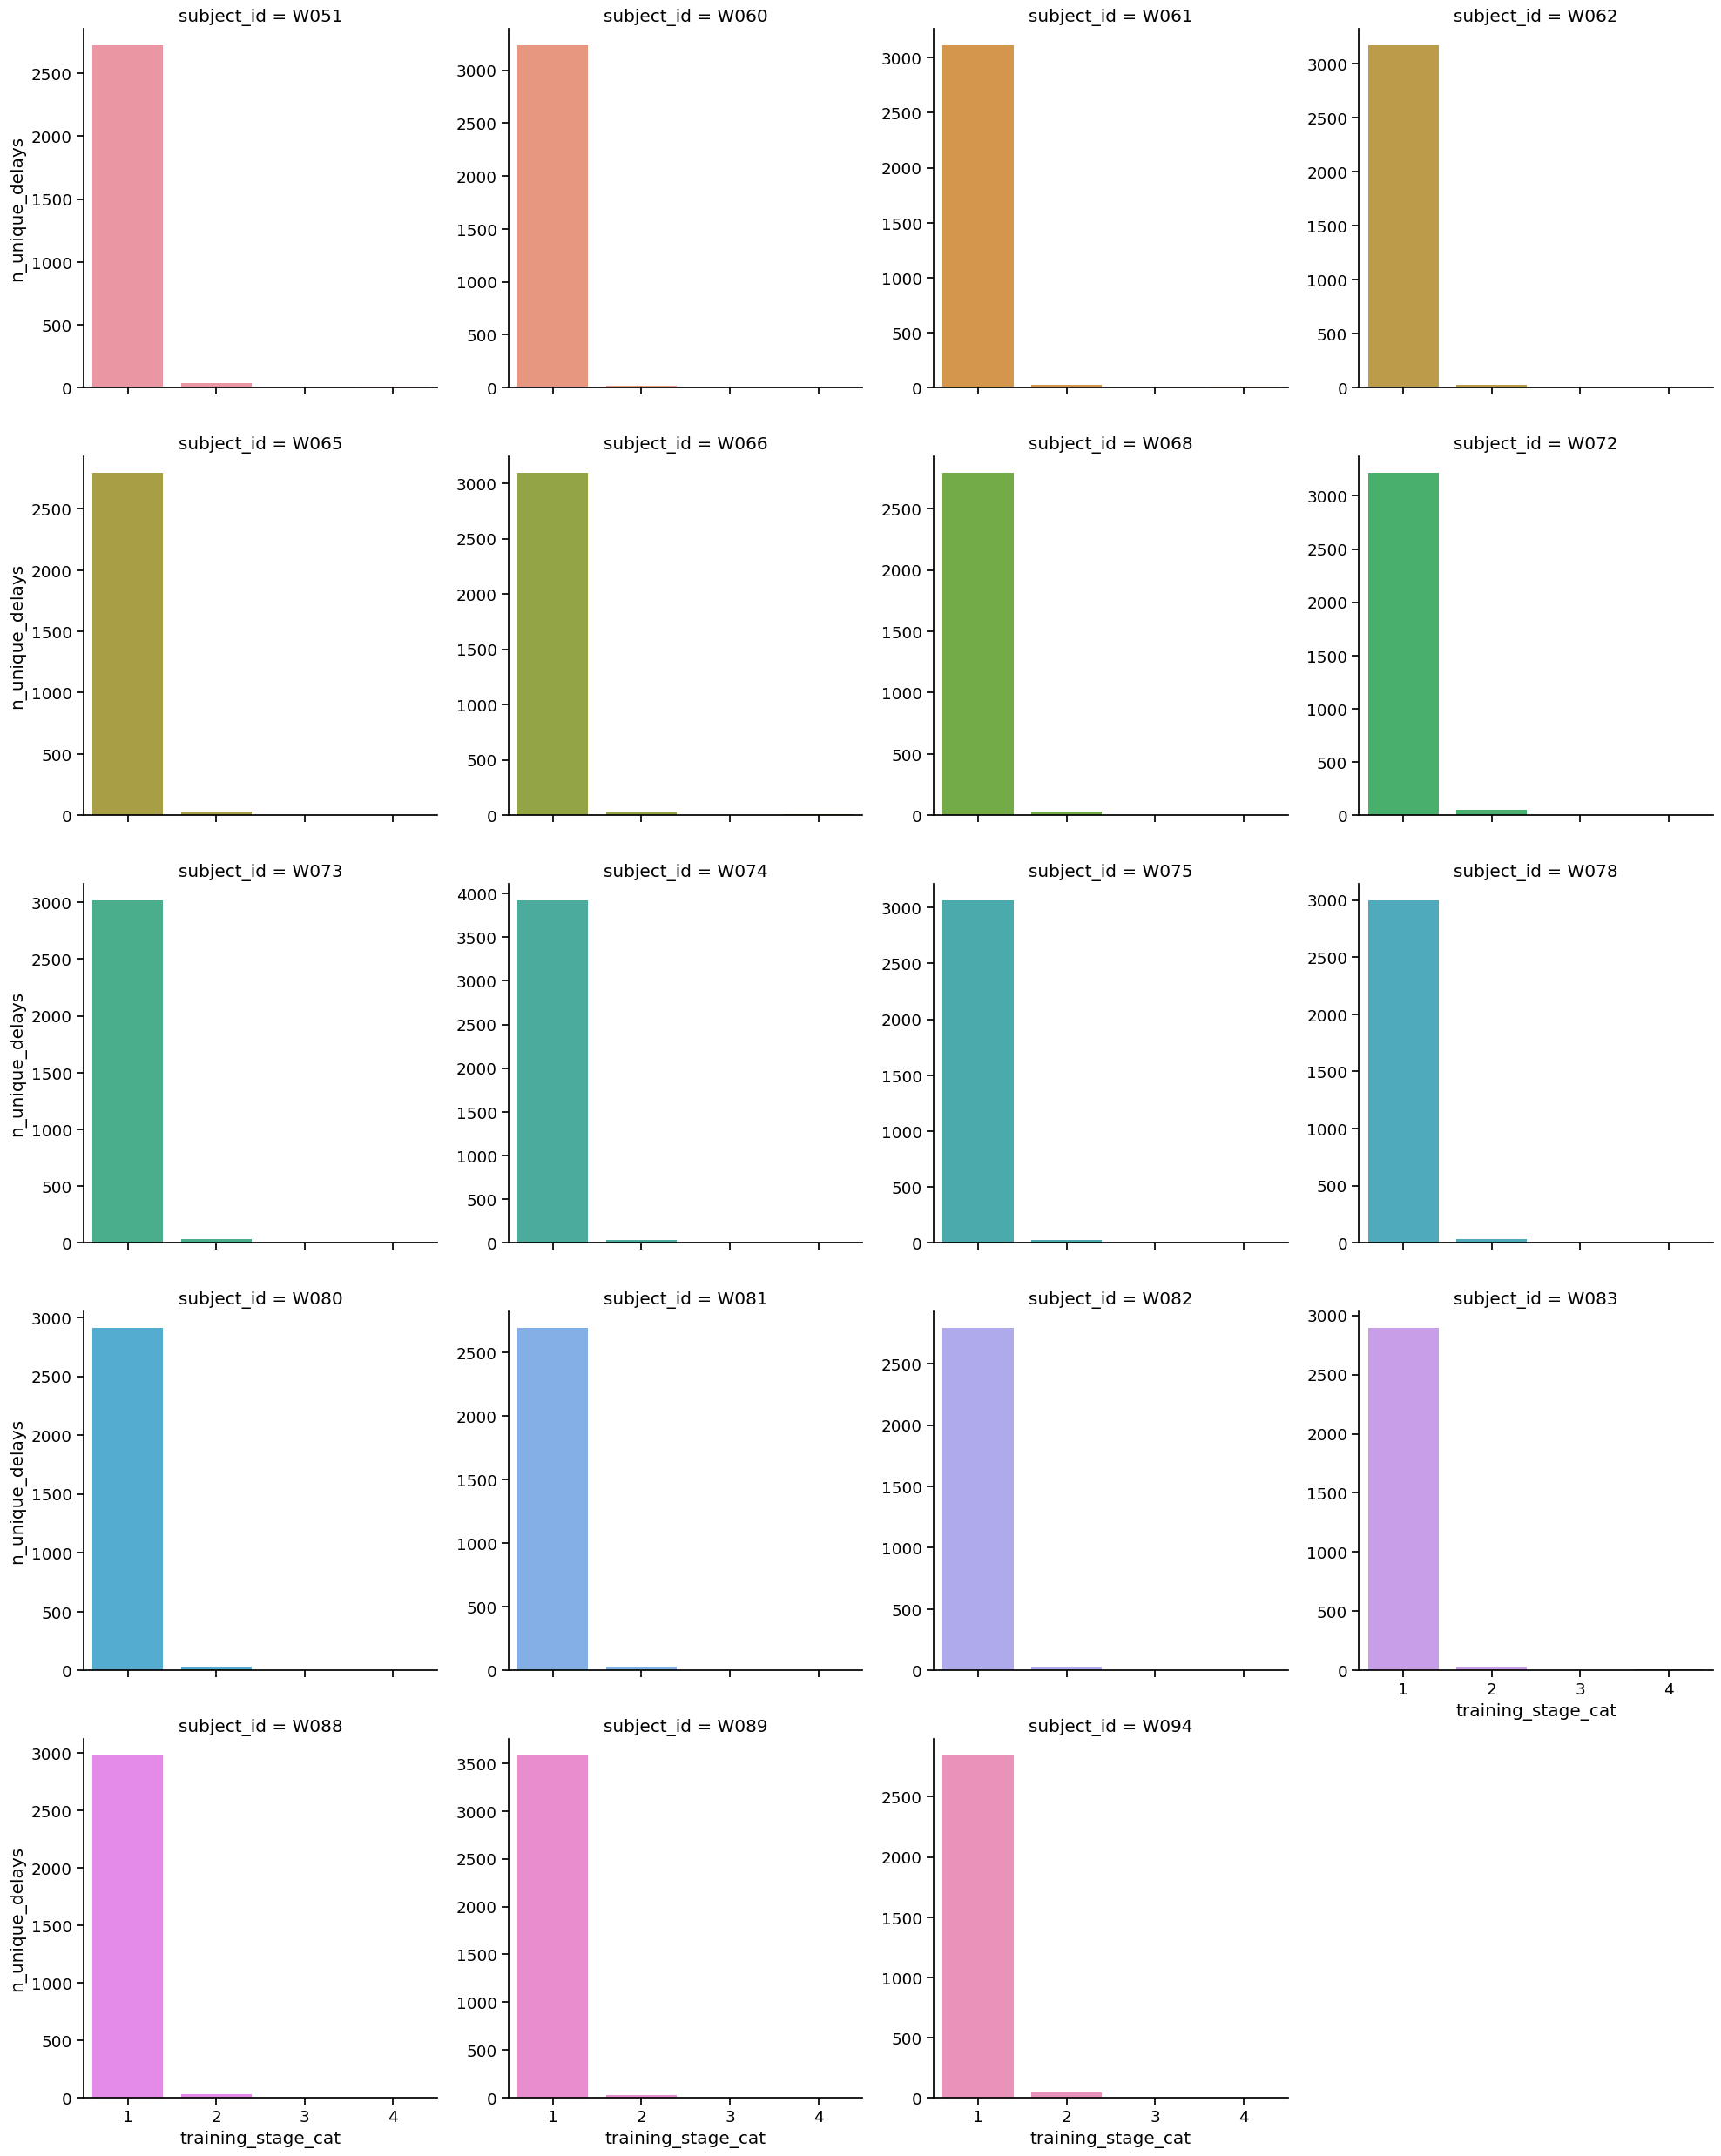

In [90]:
g = sns.catplot(
    x="training_stage_cat", 
    y="n_unique_delays", 
    col="subject_id", 
    col_wrap=4, 
    hue="subject_id", 
    data=unique_delays, 
    kind="bar", 
    dodge=False,
    sharey=False
)


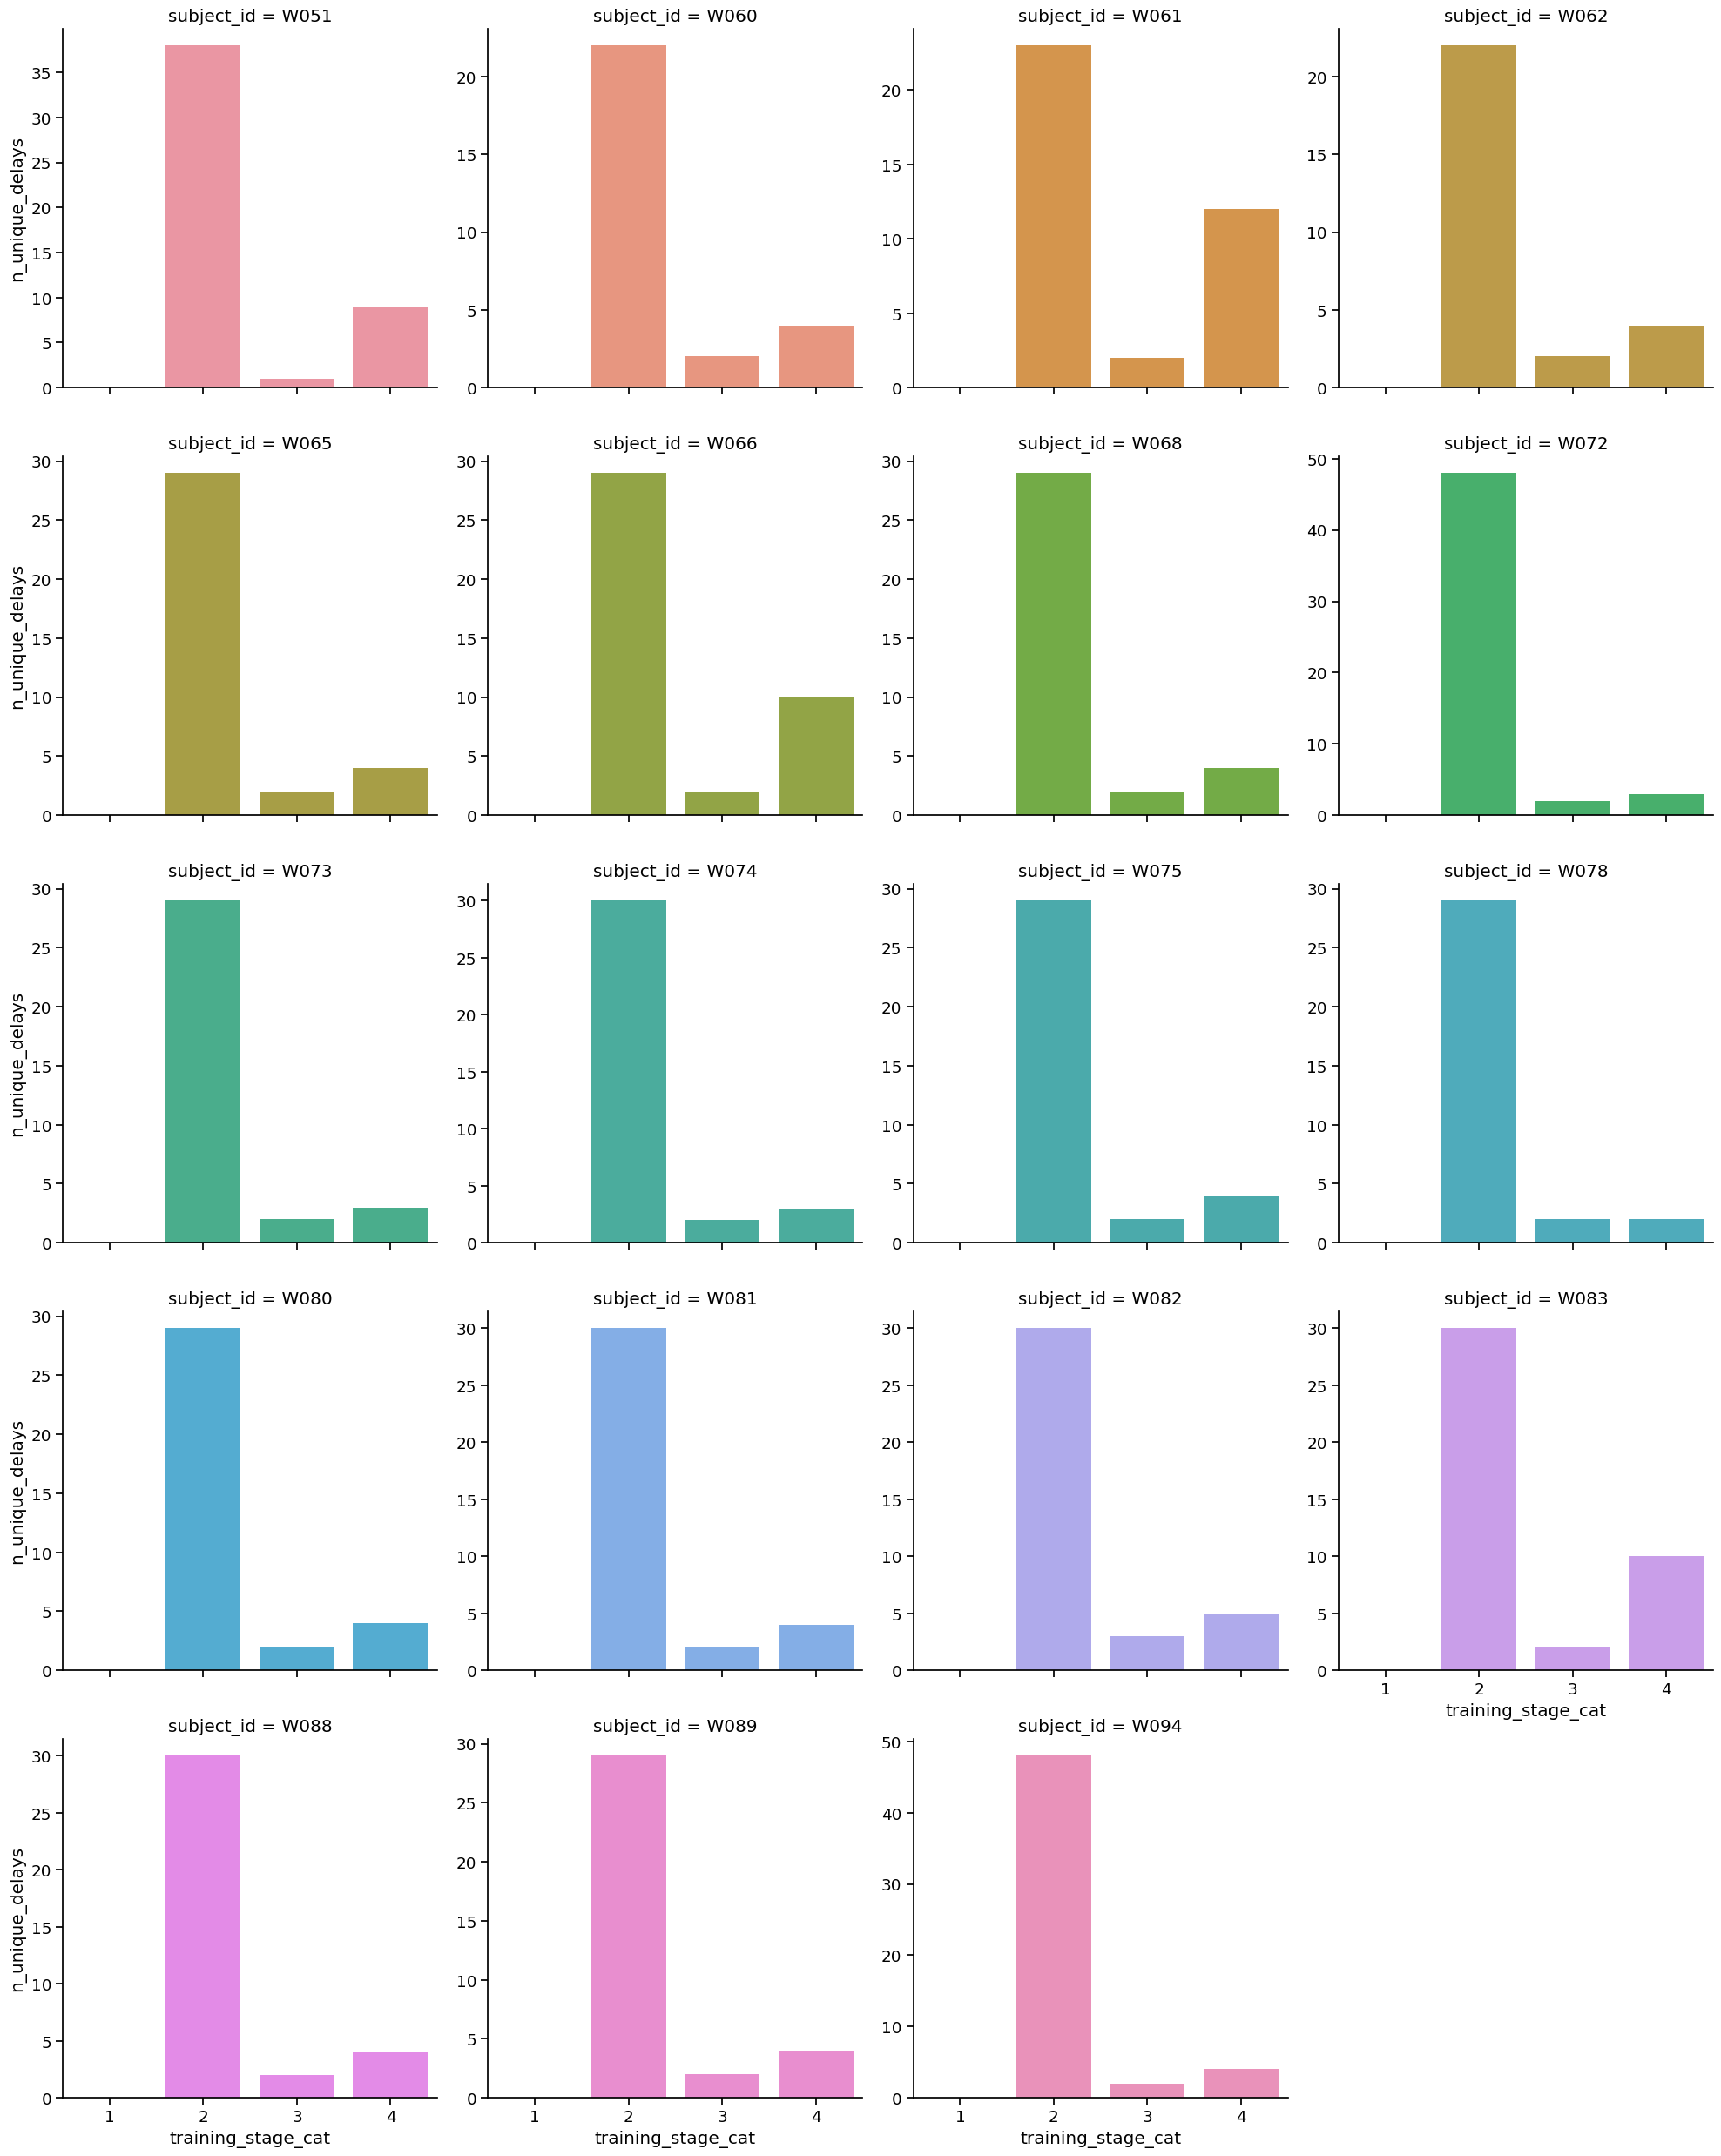

In [91]:
g = sns.catplot(
    x="training_stage_cat", 
    y="n_unique_delays", 
    col="subject_id", 
    col_wrap=4, 
    hue="subject_id", 
    data=unique_delays.query('training_stage_cat != 1'), 
    kind="bar", 
    dodge=False,
    sharey=False

)



Plot 2- delay count colored by stage per animal

In [120]:
rat_df_filtered = RAT_DF[RAT_DF['subject_id'].isin(['W083', 'W080', 'W089', 'W094'])]
delay_params_df = RAT_DF.groupby(["subject_id", "training_stage_cat", "session"]).delay.agg(["min", "max", "median"]).reset_index()


Plotting average delay across sessions for each animal colored by training stage.

Things to note
* stage 1 is primary growth
* stage 2 is very short
* sometimes animals get sent back breifly to stage 1, e.g. W060
* stage 3 is quite stable
* stage 4 is the largest amount of time and the delay parameters change during it

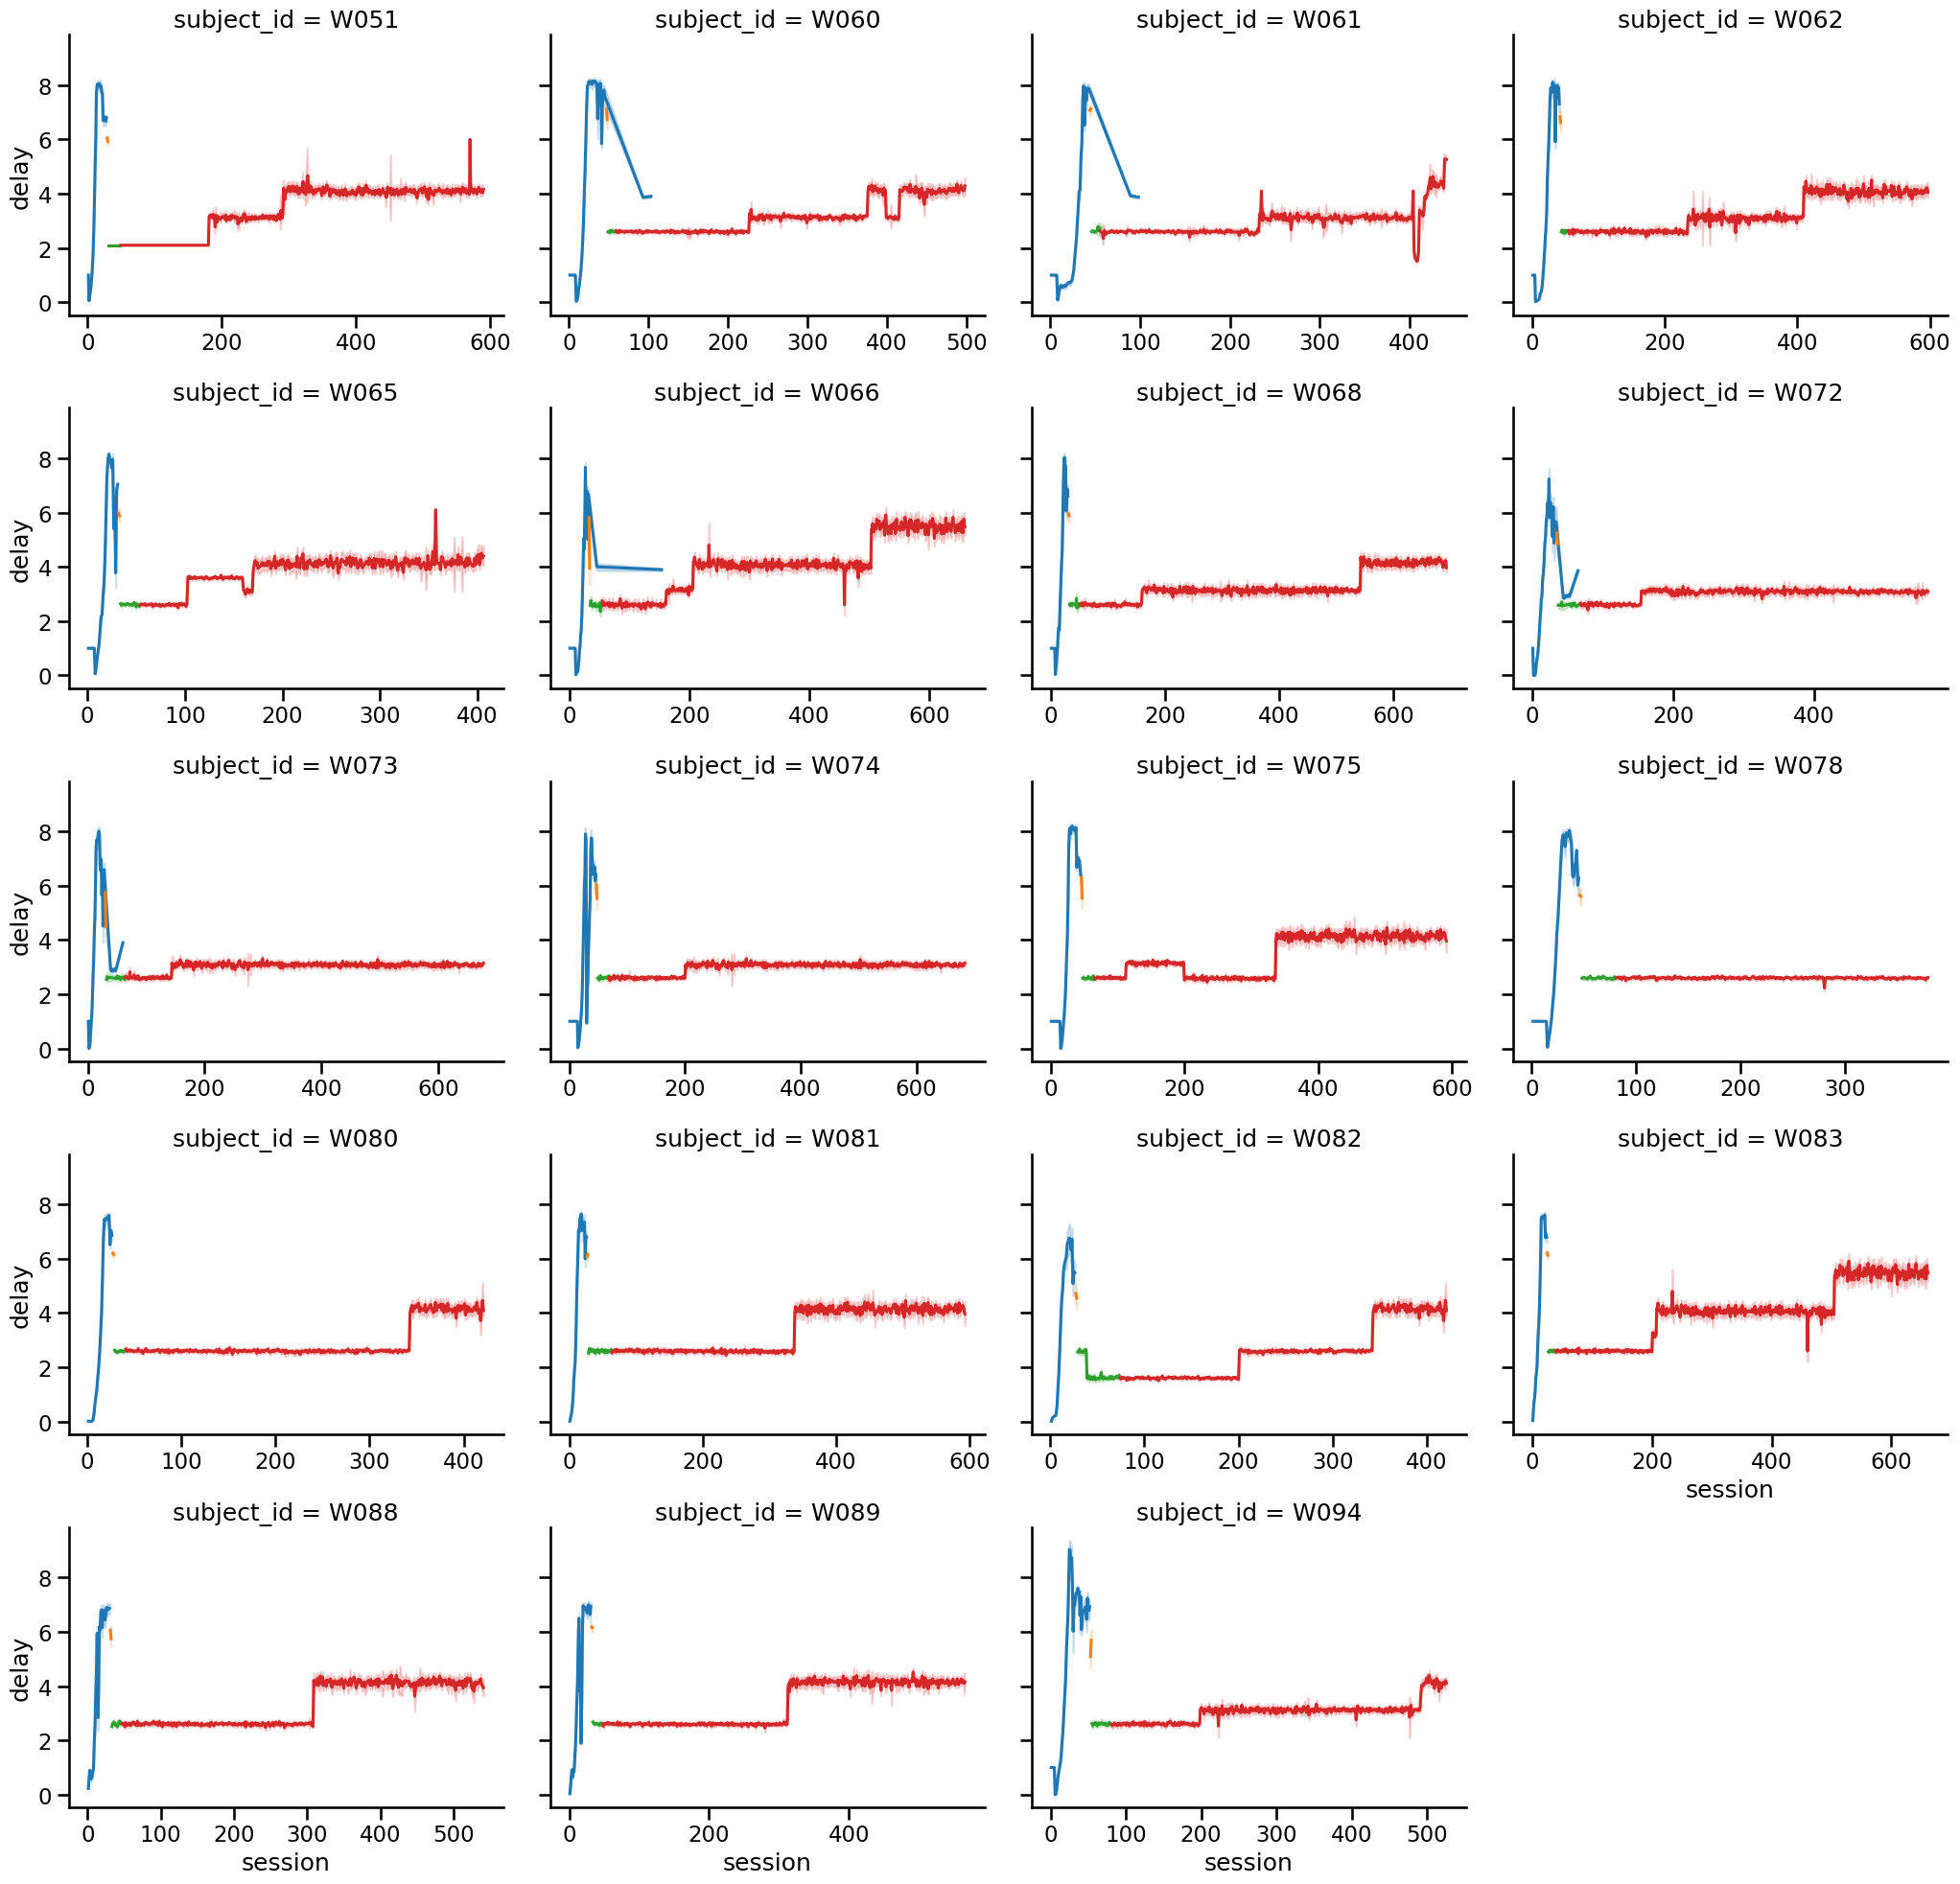

In [31]:
g = sns.FacetGrid(
    data=RAT_DF, 
    col="subject_id", 
    hue="training_stage",  
    col_wrap=4, 
    height=4, 
    aspect=1.3,
    sharey=True,
    sharex=False
)
g.map(sns.lineplot, "session", "delay")

Plot 4- all delays over time per animal

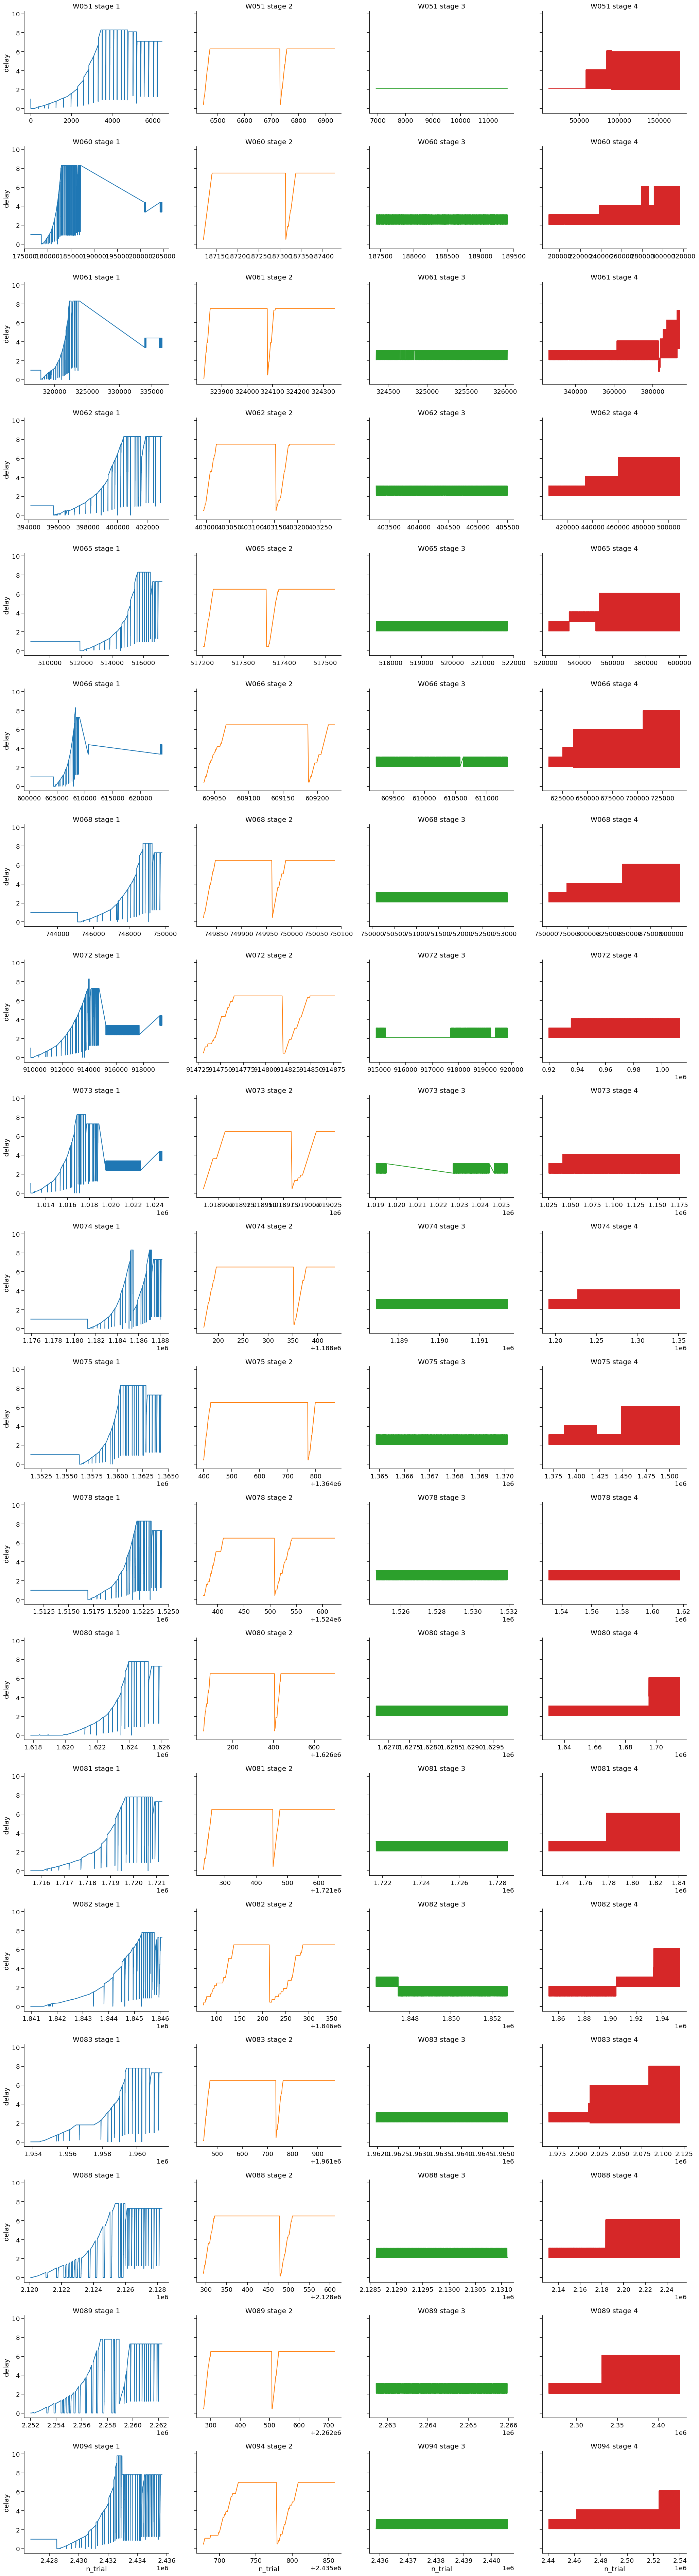

In [122]:
g = sns.FacetGrid(
    data=RAT_DF,
    row="subject_id",
    col="training_stage_cat",
    hue="training_stage_cat",
    sharey=True,
    sharex=False,
    height=4,
    aspect=1.3
)
g.map(sns.lineplot, "n_trial", "delay")
g.set_titles("{row_name} stage {col_name}")

Plot 4- Histogram of delay times per stage


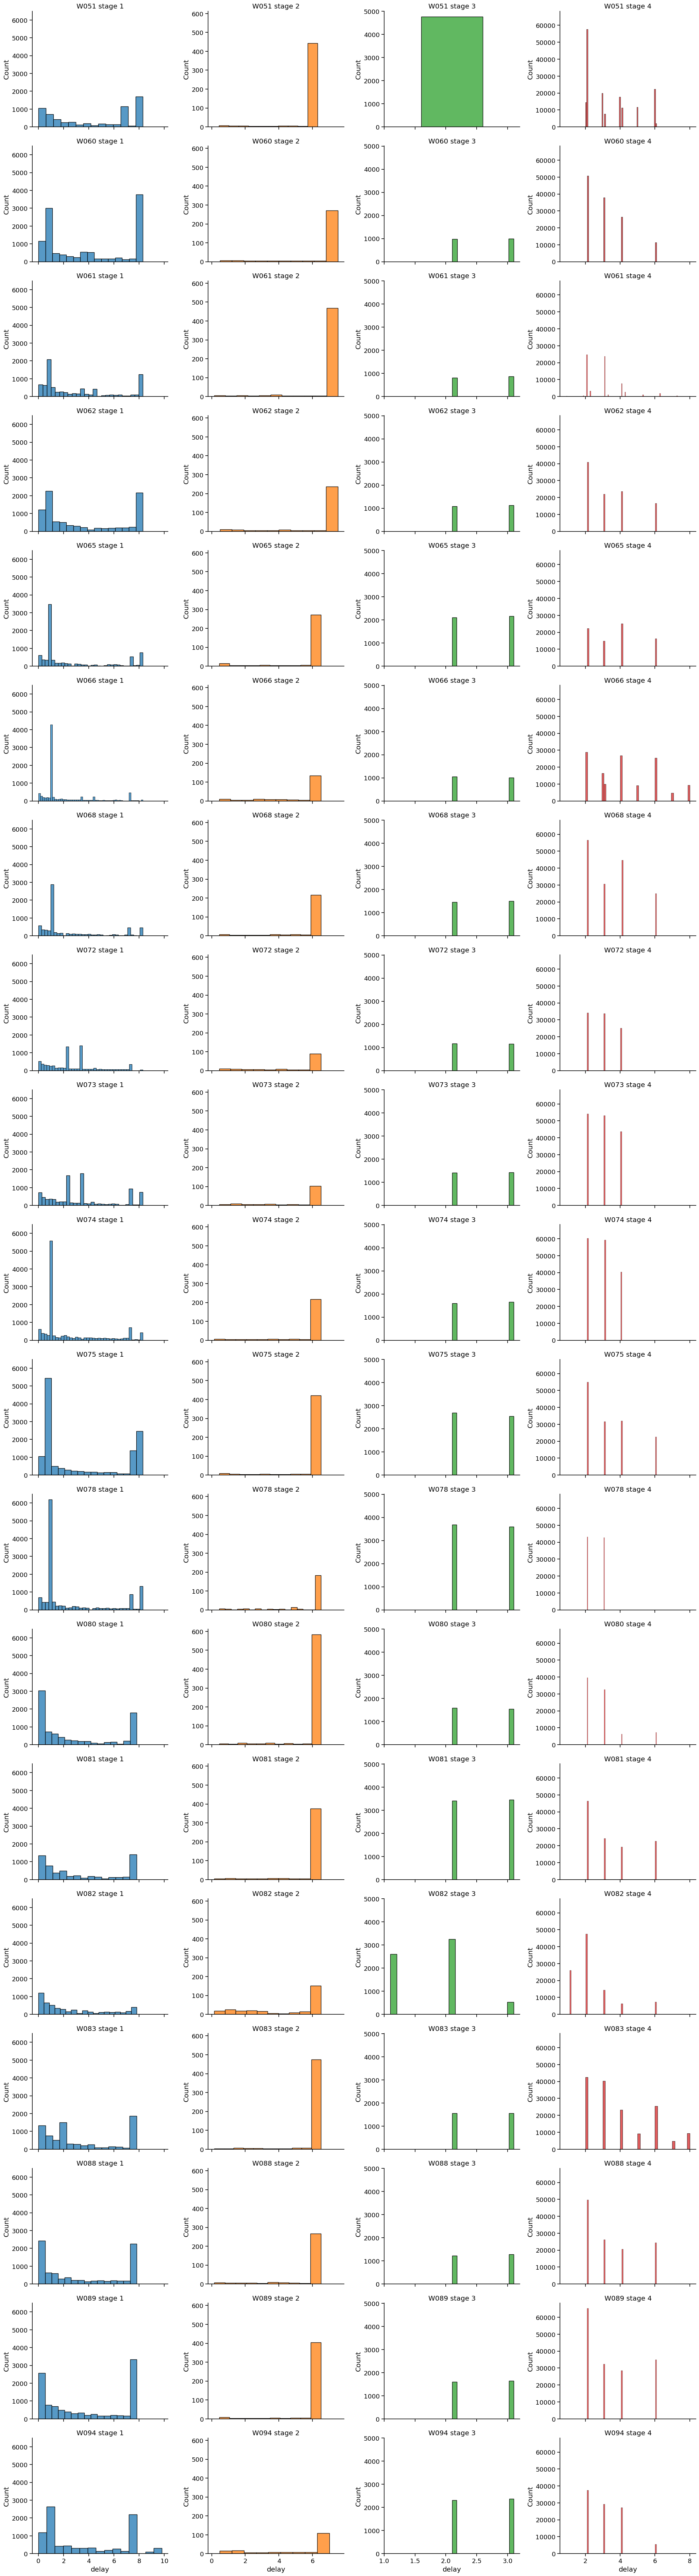

In [131]:
g = sns.FacetGrid(
    data=RAT_DF,
    row="subject_id",
    col="training_stage_cat",
    hue="training_stage_cat",
    sharey="col",
    sharex="col",
    height=4,
    aspect=1.3
)
g.map(sns.histplot, "delay")
g.set_titles("{row_name} stage {col_name}")

## Sound Pairs

In [ ]:
W080_df.groupby(["s_a", "s_b"]).size().reset_index().rename(columns={0:'count'})

s_a   s_b  count
0   60.0  68.0  14436
1   68.0  60.0  10247
2   68.0  76.0   8863
3   68.5  76.0    345
4   71.5  76.0    347
5   74.5  76.0    363
6   76.0  68.0  10176
7   76.0  84.0   8952
8   77.5  76.0    396
9   80.5  76.0    383
10  83.5  76.0    351
11  84.0  76.0  10146
12  84.0  92.0   8736
13  92.0  84.0  15750